<a href="https://colab.research.google.com/github/sheunq/British-Airway-customer-booking/blob/main/customer_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

Exploratory data analysis
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.


To provide more context, below is a more detailed data description, explaining exactly what each column means:

num_passengers = number of passengers travelling

sales_channel = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

purchase_lead = number of days between travel date and booking date

length_of_stay = number of days spent at destination

flight_hour = hour of flight departure

flight_day = day of week of flight departure

route = origin -> destination flight route

booking_origin = country from where booking was made

wants_extra_baggage = if the customer wanted extra baggage in the booking

wants_preferred_seat = if the customer wanted a preferred seat in the booking

wants_in_flight_meals = if the customer wanted in-flight meals in the booking

flight_duration = total duration of flight (in hours)

booking_complete = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [1]:
!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 67.5 MB/s eta 0:00:00


In [2]:
import sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set()

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_booking.csv', sep=',' , encoding='latin-1')
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

                                             |          | [  0%]   00:00 -> (? left)


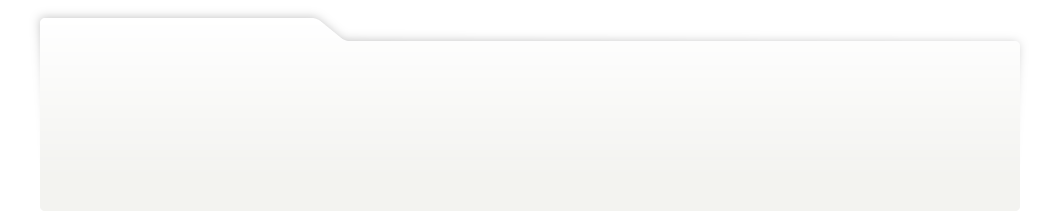
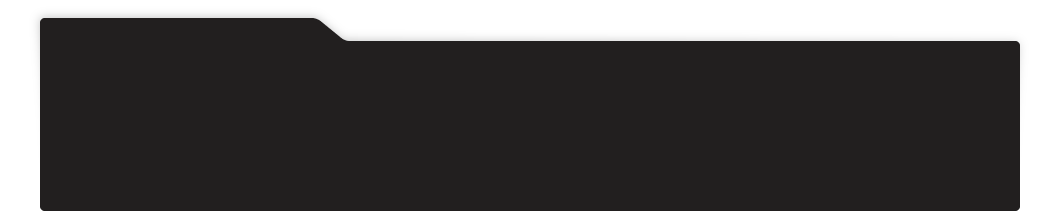
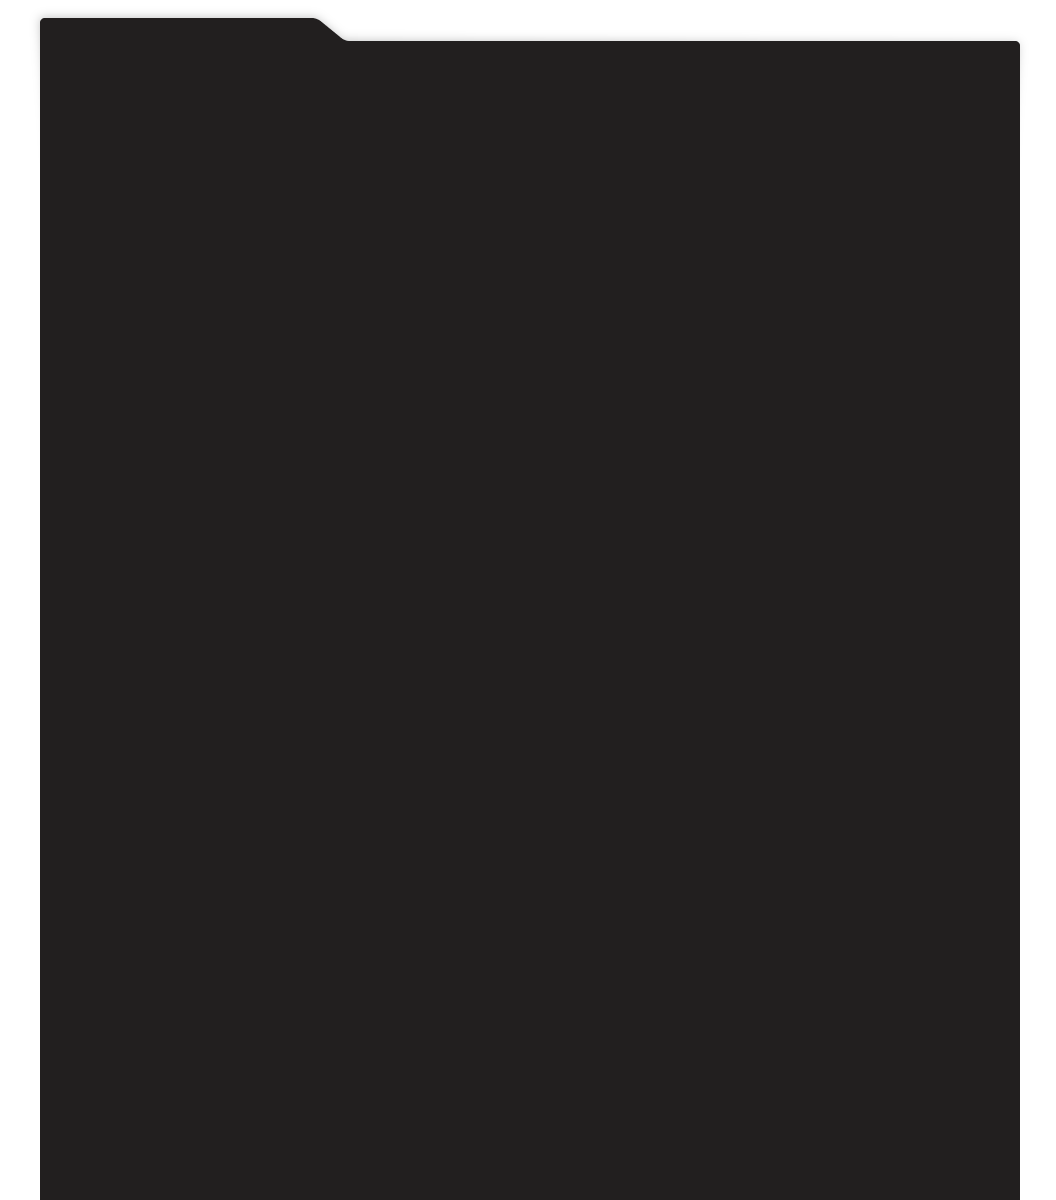
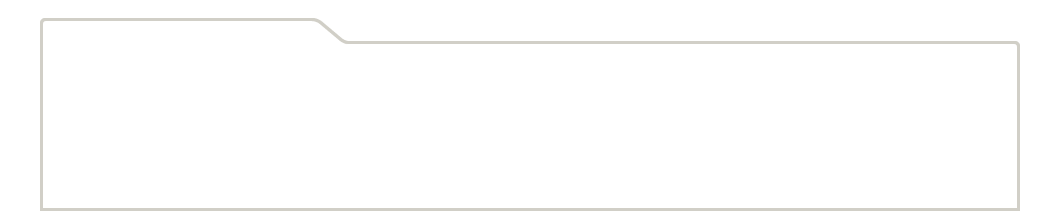
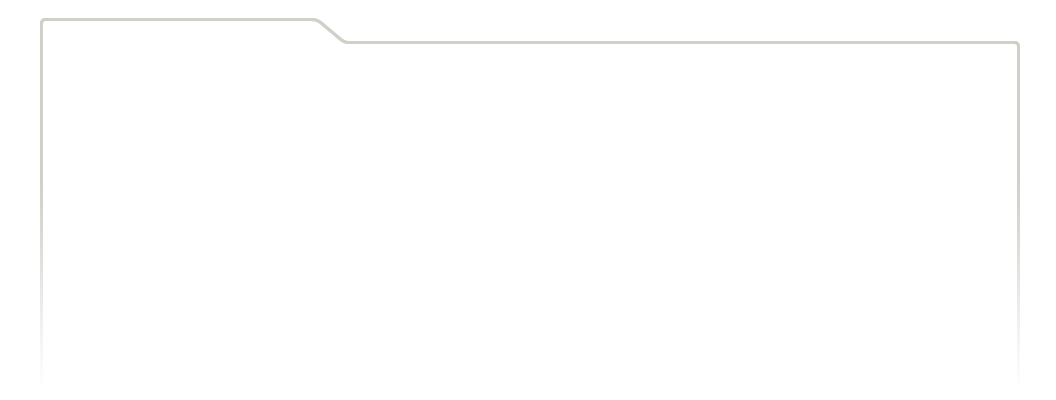
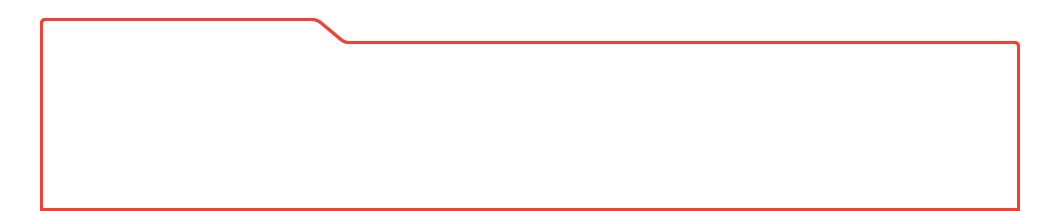
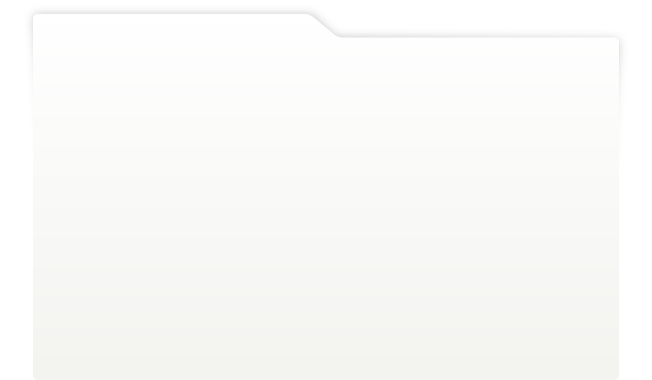
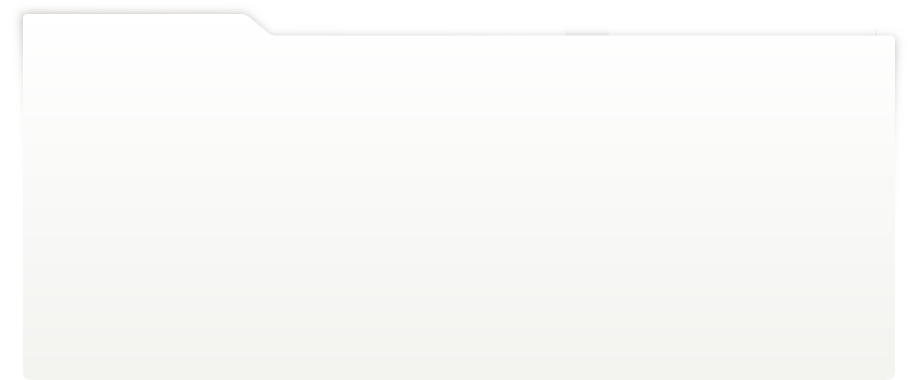
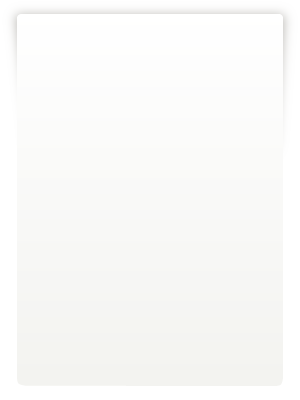
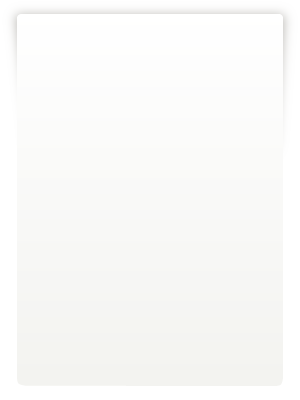
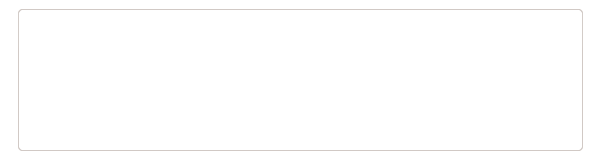
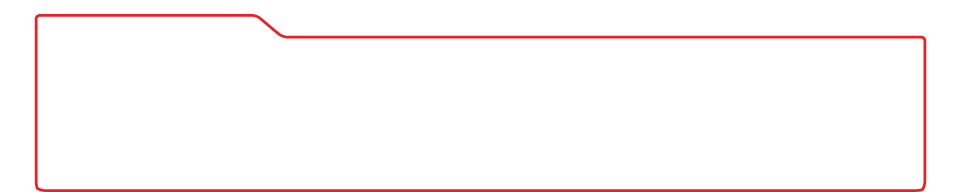
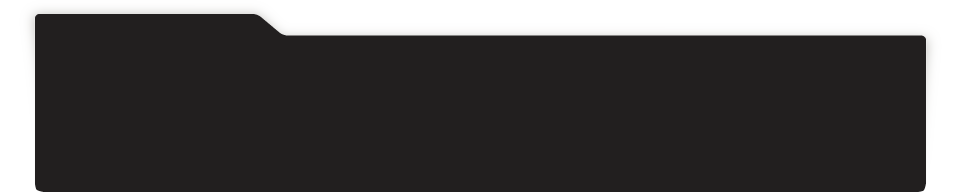
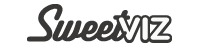
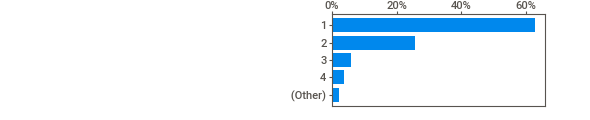
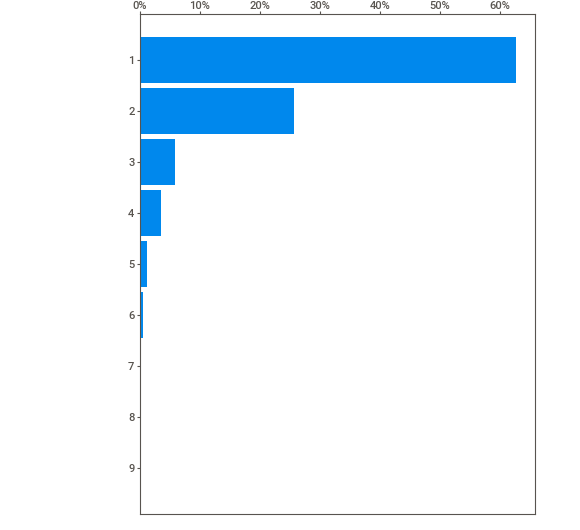
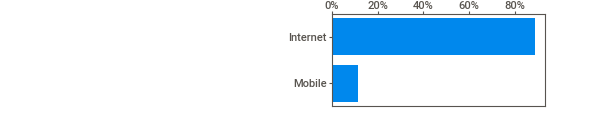
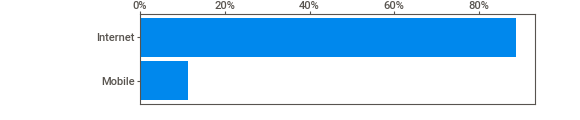
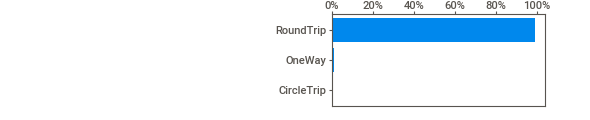
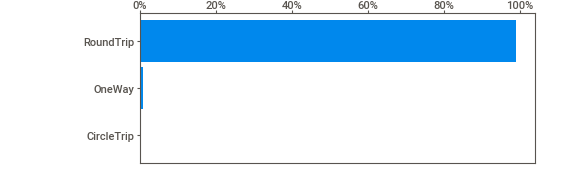
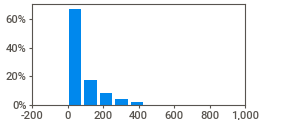
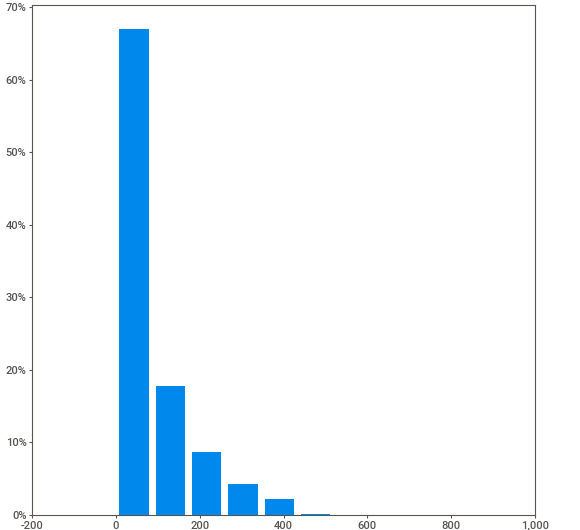
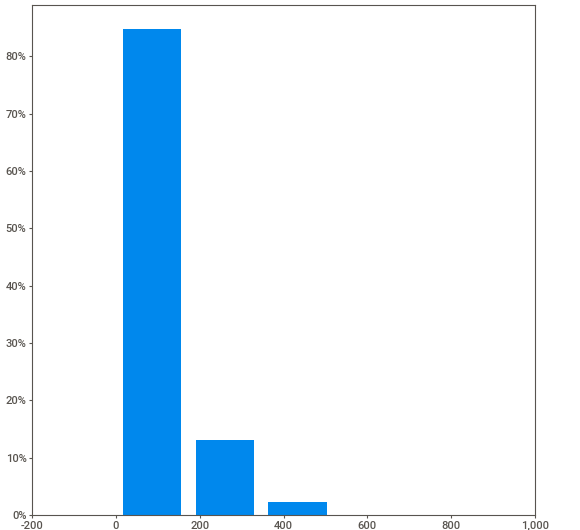
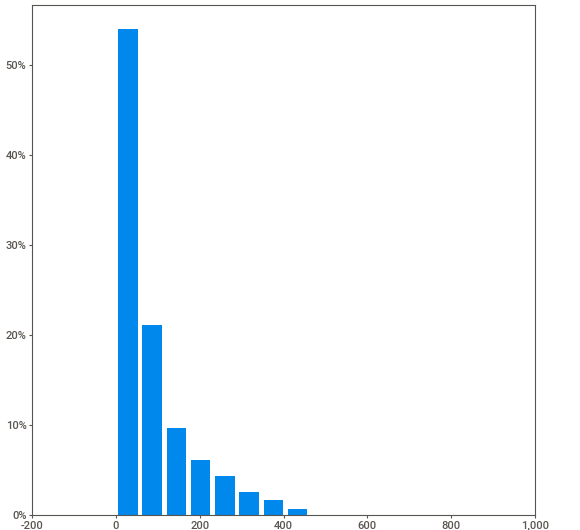
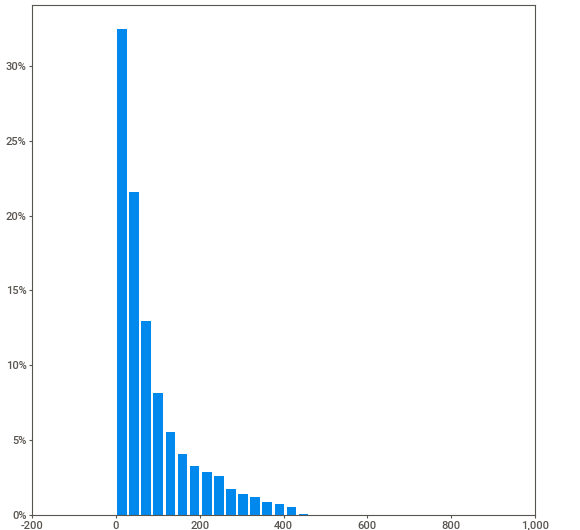
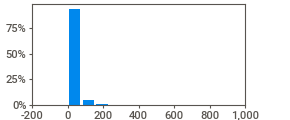
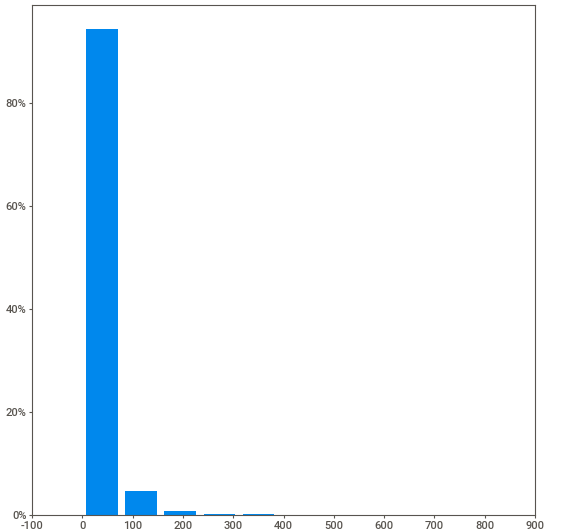
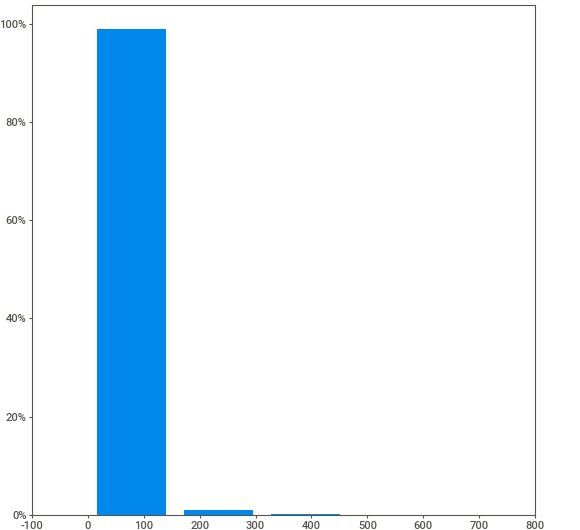
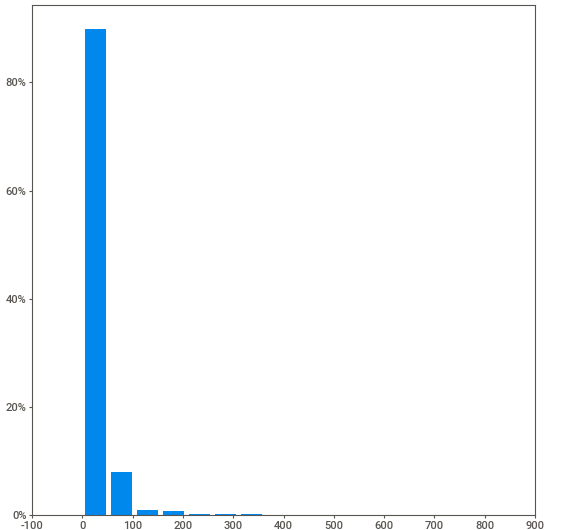
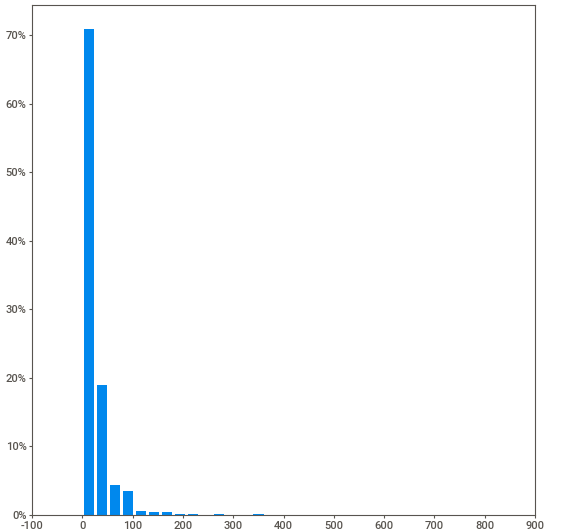
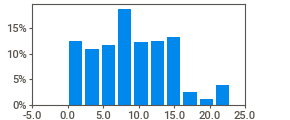
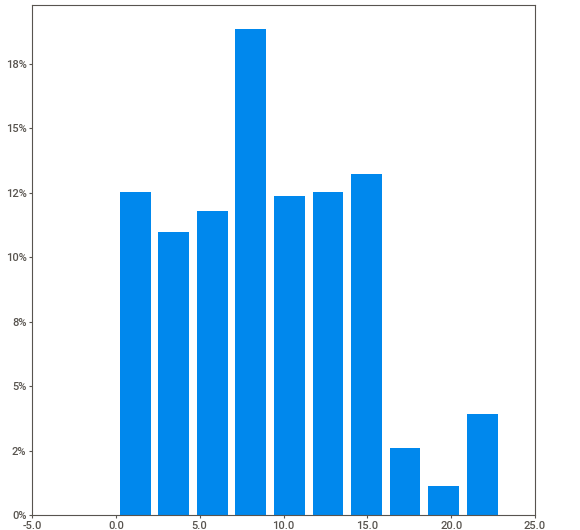
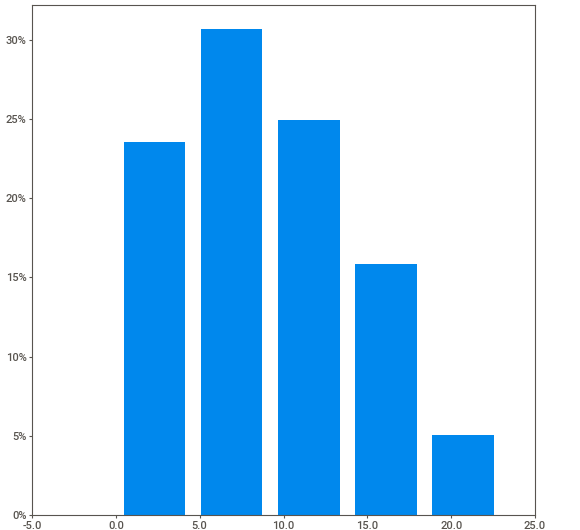
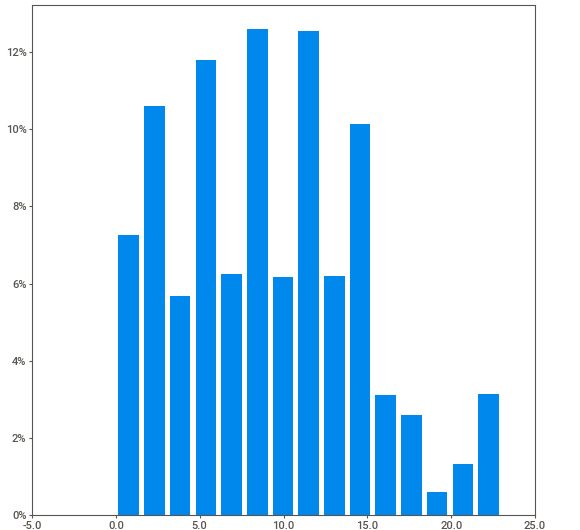
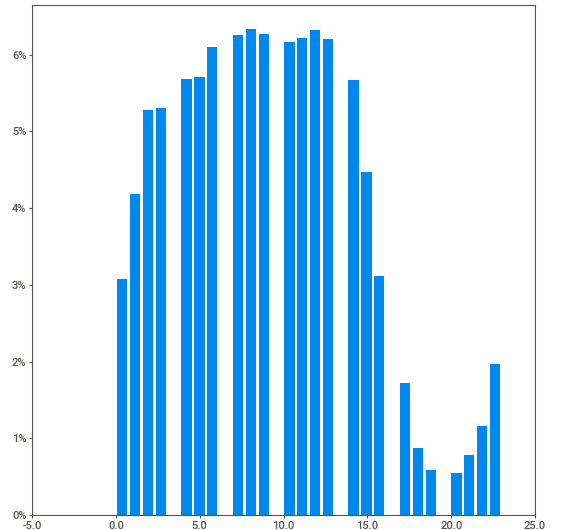
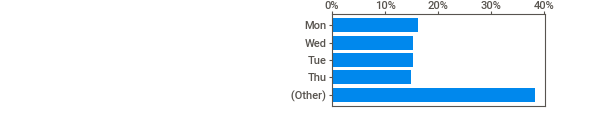
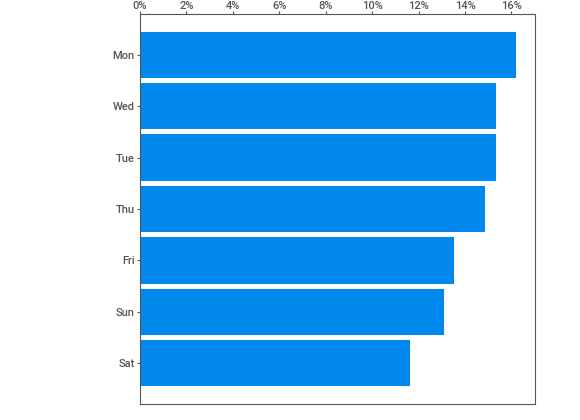
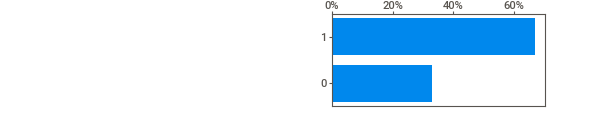
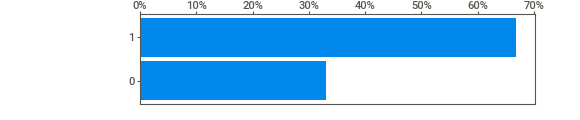
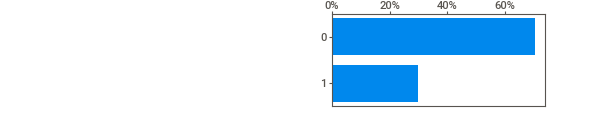
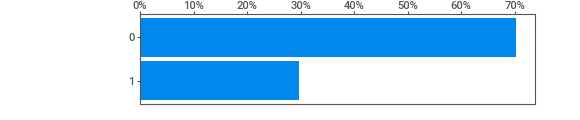
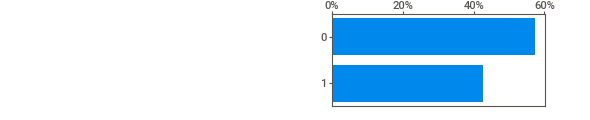
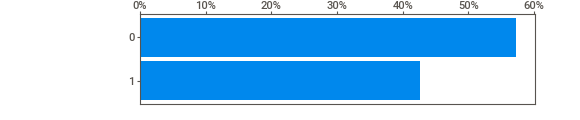
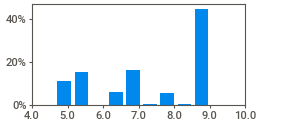
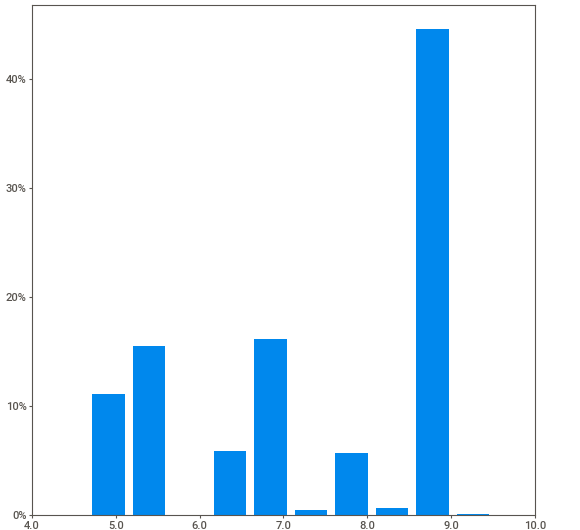
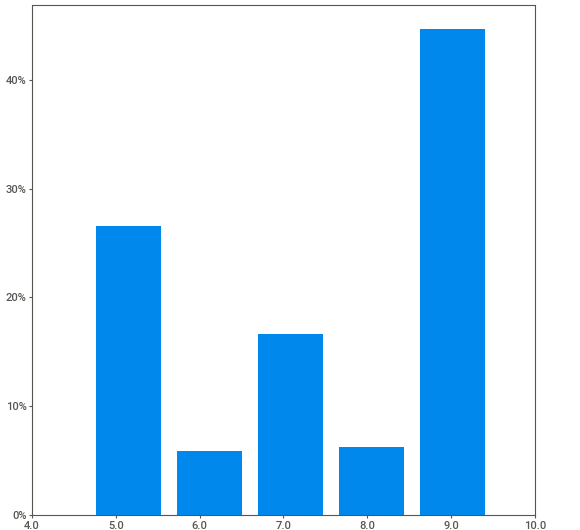
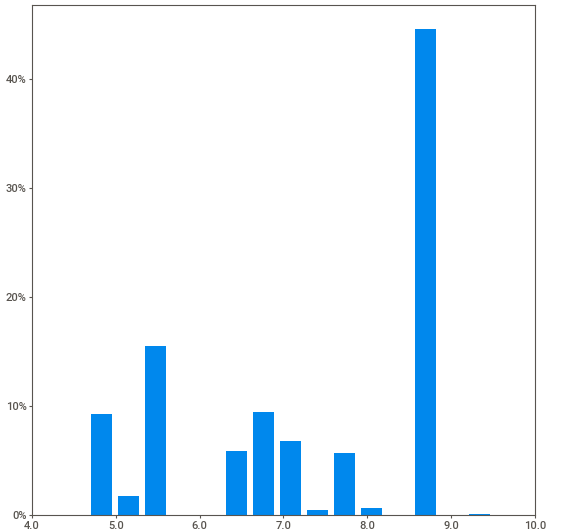
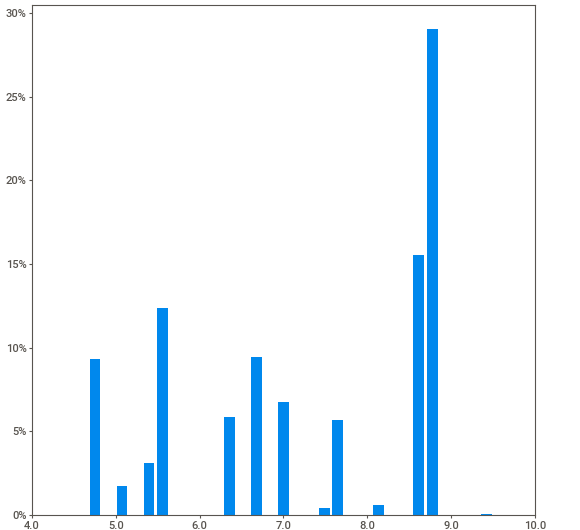
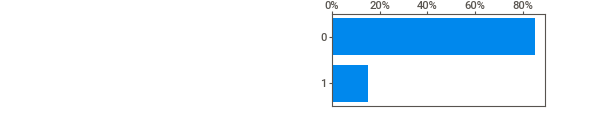
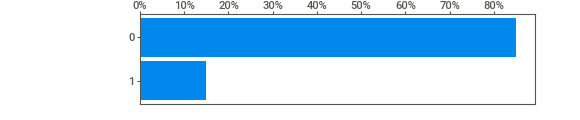
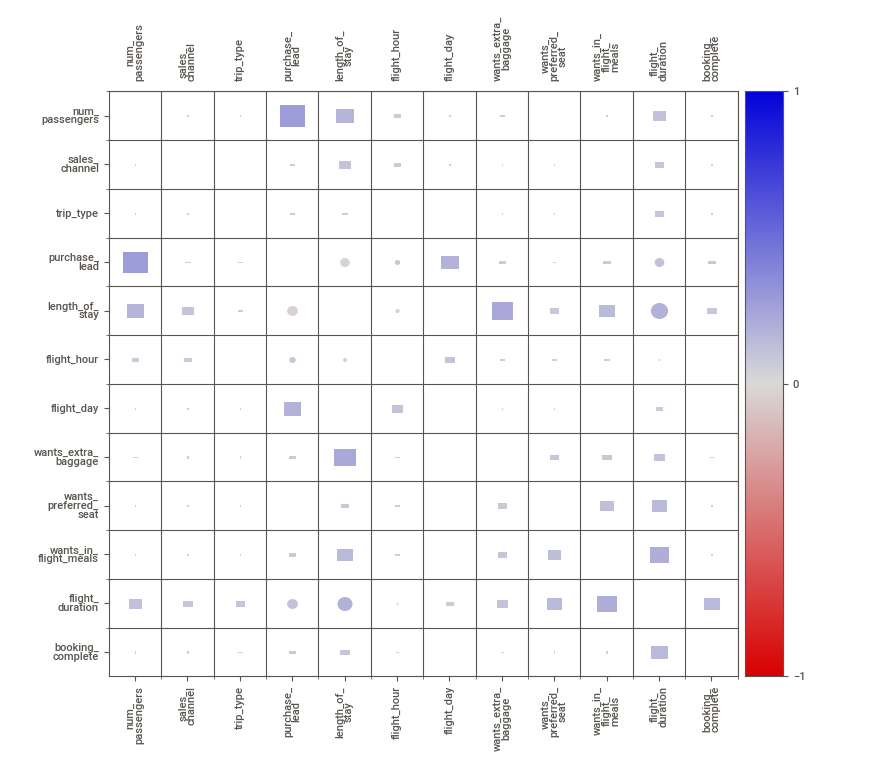
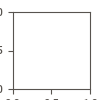

In [4]:
viz=sweetviz.analyze(df)
viz.show_notebook()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.describe(include='all')

num_passengers sales_channel  trip_type  purchase_lead  \
count     50000.000000         50000      50000   50000.000000   
unique             NaN             2          3            NaN   
top                NaN      Internet  RoundTrip            NaN   
freq               NaN         44382      49497            NaN   
mean          1.591240           NaN        NaN      84.940480   
std           1.020165           NaN        NaN      90.451378   
min           1.000000           NaN        NaN       0.000000   
25%           1.000000           NaN        NaN      21.000000   
50%           1.000000           NaN        NaN      51.000000   
75%           2.000000           NaN        NaN     115.000000   
max           9.000000           NaN        NaN     867.000000   

        length_of_stay  flight_hour flight_day   route booking_origin  \
count      50000.00000  50000.00000      50000   50000          50000   
unique             NaN          NaN          7     799            104   
top                NaN          NaN        Mon  AKLKUL      Australia   
freq               NaN          NaN       8102    2680          17872   
mean          23.04456      9.06634        NaN     NaN            NaN   
std           33.88767      5.41266        NaN     NaN            NaN   
min            0.00000      0.00000        NaN     NaN            NaN   
25%            5.00000      5.00000        NaN     NaN            NaN   
50%           17.00000      9.00000        NaN     NaN            NaN   
75%           28.00000     13.00000        NaN     NaN            NaN   
max          778.00000     23.00000        NaN     NaN            NaN   

        wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count          50000.000000          50000.000000           50000.000000   
unique                  NaN                   NaN                    NaN   
top                     NaN                   NaN                    NaN   
freq                    NaN                   NaN                    NaN   
mean               0.668780              0.296960               0.427140   
std                0.470657              0.456923               0.494668   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               0.000000   
50%                1.000000              0.000000               0.000000   
75%                1.000000              1.000000               1.000000   
max                1.000000              1.000000               1.000000   

        flight_duration  booking_complete  
count      50000.000000      50000.000000  
unique              NaN               NaN  
top                 NaN               NaN  
freq                NaN               NaN  
mean           7.277561          0.149560  
std            1.496863          0.356643  
min            4.670000          0.000000  
25%            5.620000          0.000000  
50%            7.570000          0.000000  
75%            8.830000          0.000000  
max            9.500000          1.000000

In [7]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
df.select_dtypes(include='object').head()

sales_channel  trip_type flight_day   route booking_origin
0      Internet  RoundTrip        Sat  AKLDEL    New Zealand
1      Internet  RoundTrip        Sat  AKLDEL    New Zealand
2      Internet  RoundTrip        Wed  AKLDEL          India
3      Internet  RoundTrip        Sat  AKLDEL    New Zealand
4      Internet  RoundTrip        Wed  AKLDEL          India

In [10]:
#plt.annotate(xy=([c for c in df.groupby(cat_car)[i].mean().index],[a for a in df.groupby(cat_car)[i].mean().values]), # these are the coordinates to position the label
 #                textcoords="offset points", # how to position the text
 #                xytext=(0,3), # distance from text to points (x,y)
  #               ha='center')

In [11]:
def visualize(cat_car):
  for i in df.select_dtypes(exclude='object').columns:
    display(df.groupby(cat_car)[i].mean())
    plt.figure(figsize=(20,10))
    display(sns.barplot(x=df.groupby(cat_car)[i].mean().index,y=df.groupby(cat_car)[i].mean().values))
    plt.title(f'{cat_car} vs {i}')
    plt.xticks(rotation=90)
    #plt.text(df.groupby(cat_car)[i].mean().index,df.groupby(cat_car)[i].mean().values.round(2),ha='center',s=)
    plt.show()

booking_origin
(not set)               1.797619
Afghanistan             1.000000
Algeria                 1.000000
Argentina               1.500000
Australia               1.445333
                          ...   
United Arab Emirates    1.428571
United Kingdom          1.485549
United States           1.427632
Vanuatu                 1.000000
Vietnam                 1.329897
Name: num_passengers, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

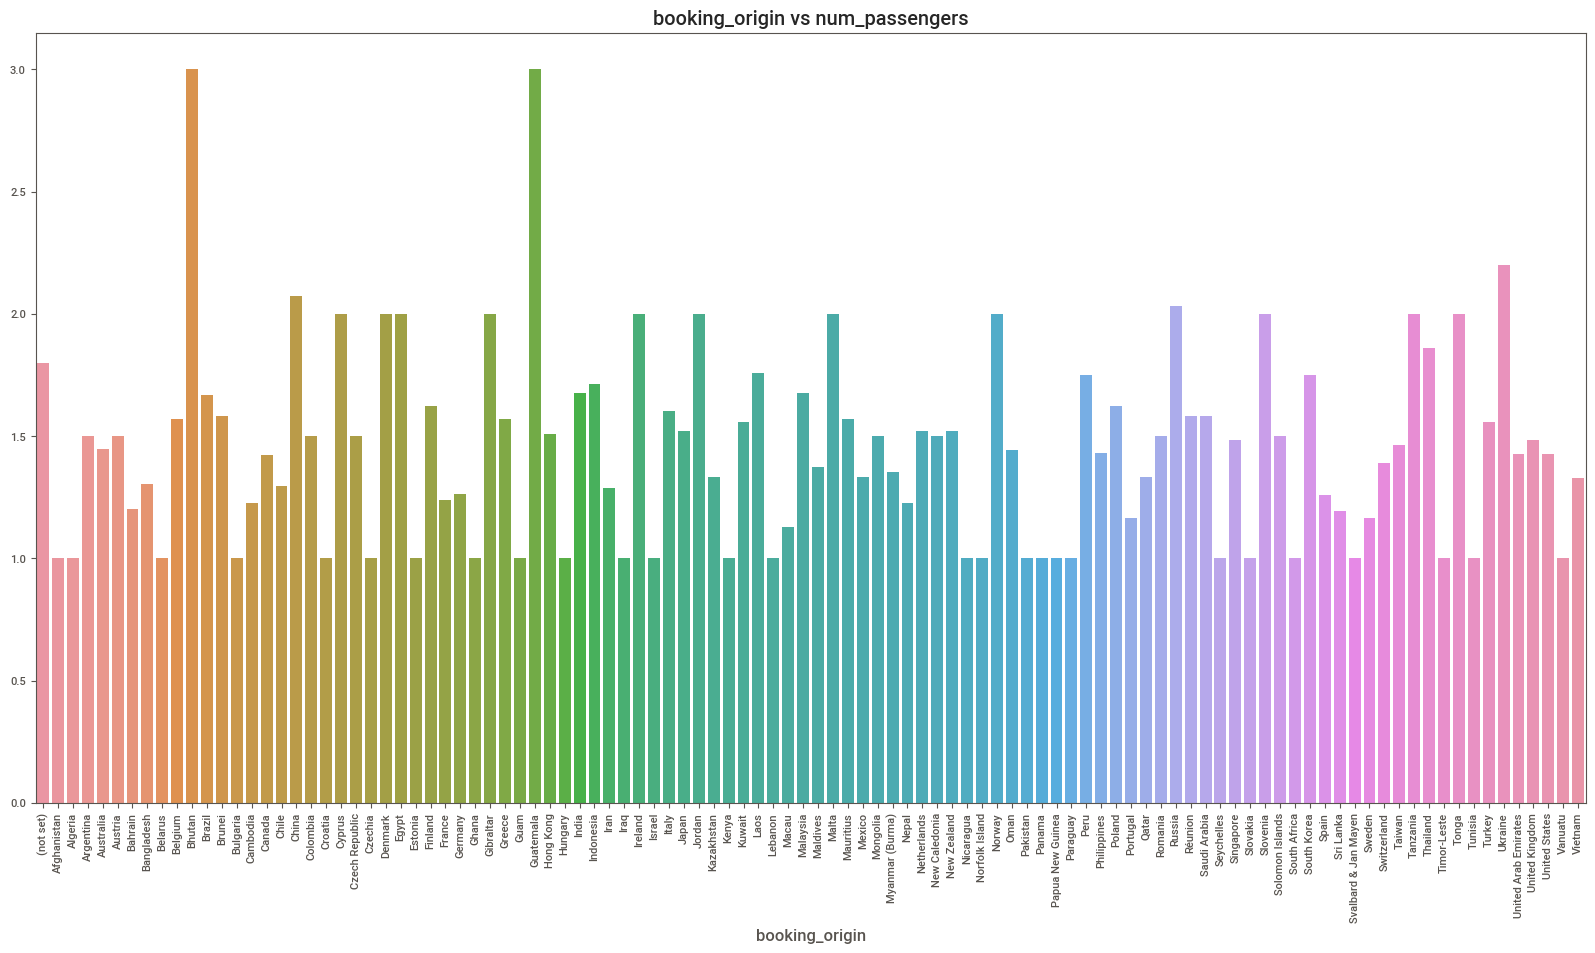

booking_origin
(not set)                80.035714
Afghanistan             191.000000
Algeria                  27.000000
Argentina                80.333333
Australia                78.579622
                           ...    
United Arab Emirates     55.928571
United Kingdom           78.624277
United States            69.554825
Vanuatu                  11.000000
Vietnam                  69.422680
Name: purchase_lead, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

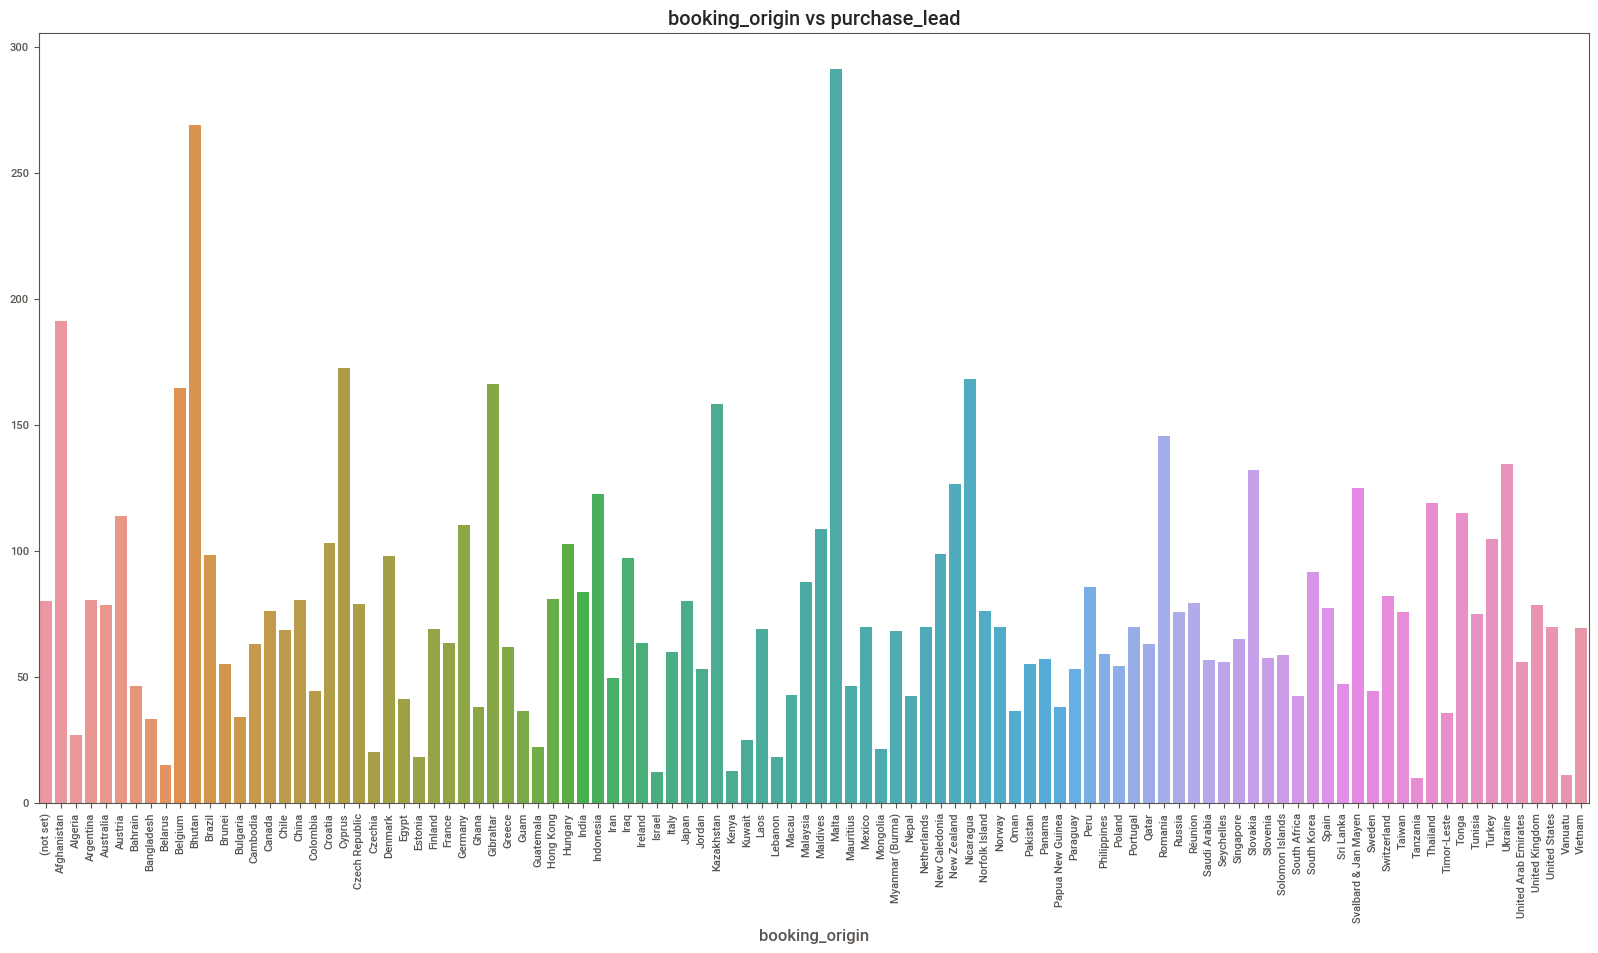

booking_origin
(not set)               17.083333
Afghanistan              2.000000
Algeria                  6.000000
Argentina               27.333333
Australia               29.186381
                          ...    
United Arab Emirates    26.285714
United Kingdom          23.895954
United States           18.440789
Vanuatu                  4.000000
Vietnam                 32.917526
Name: length_of_stay, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

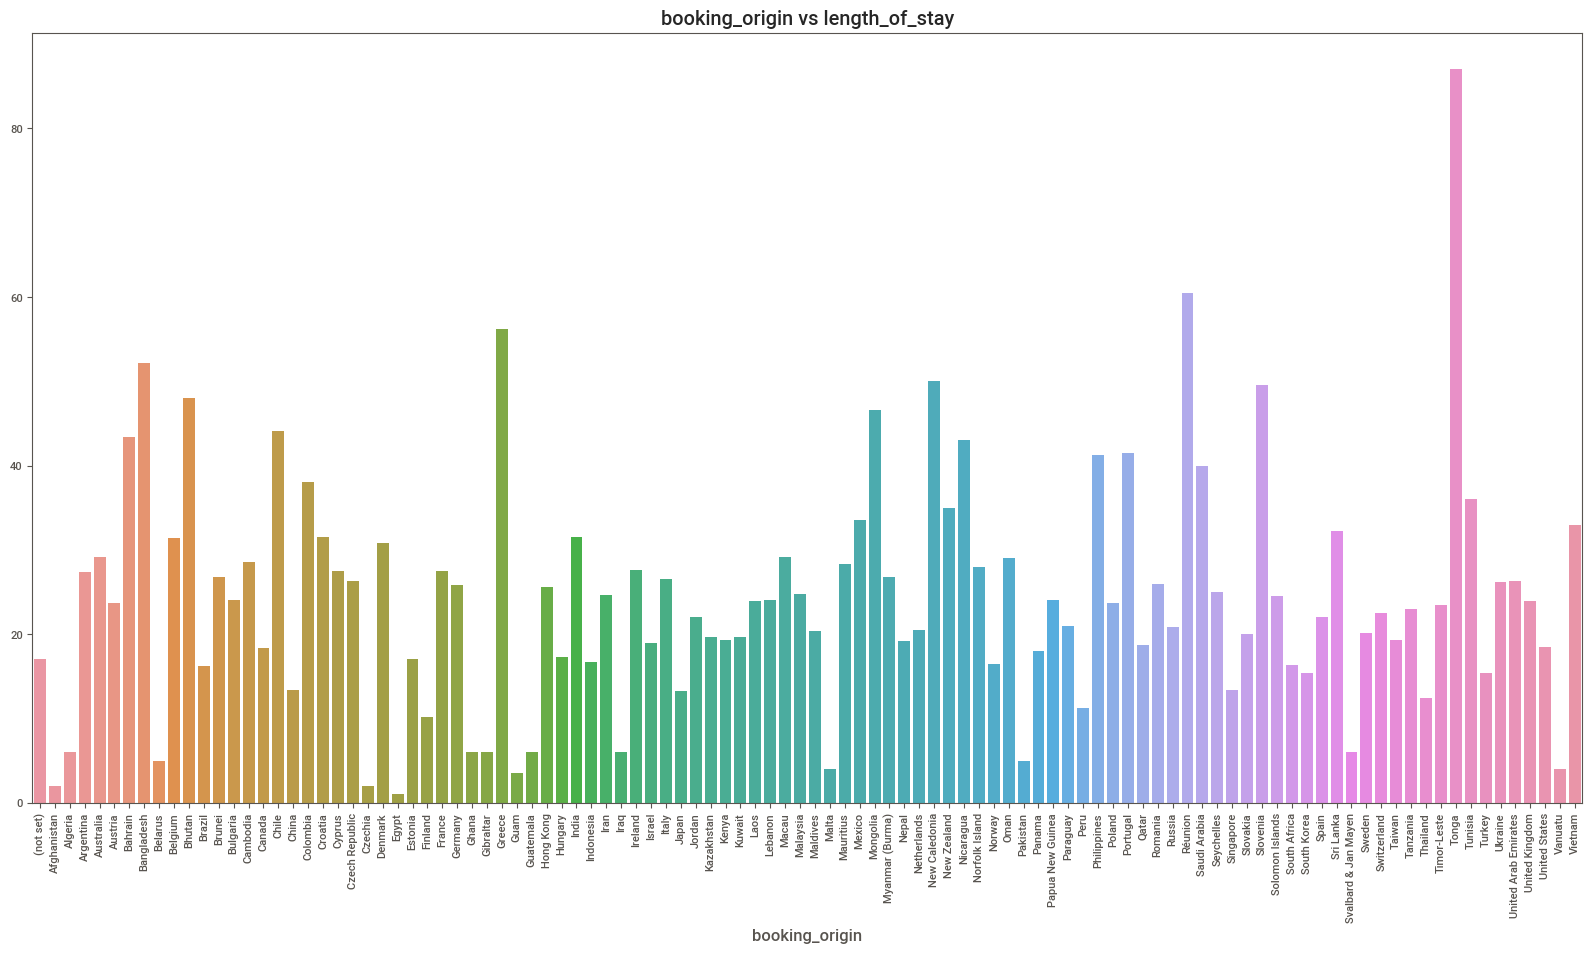

booking_origin
(not set)                8.261905
Afghanistan             16.000000
Algeria                  2.000000
Argentina               19.833333
Australia                8.734053
                          ...    
United Arab Emirates    11.047619
United Kingdom          13.387283
United States            9.824561
Vanuatu                 21.000000
Vietnam                  8.311856
Name: flight_hour, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

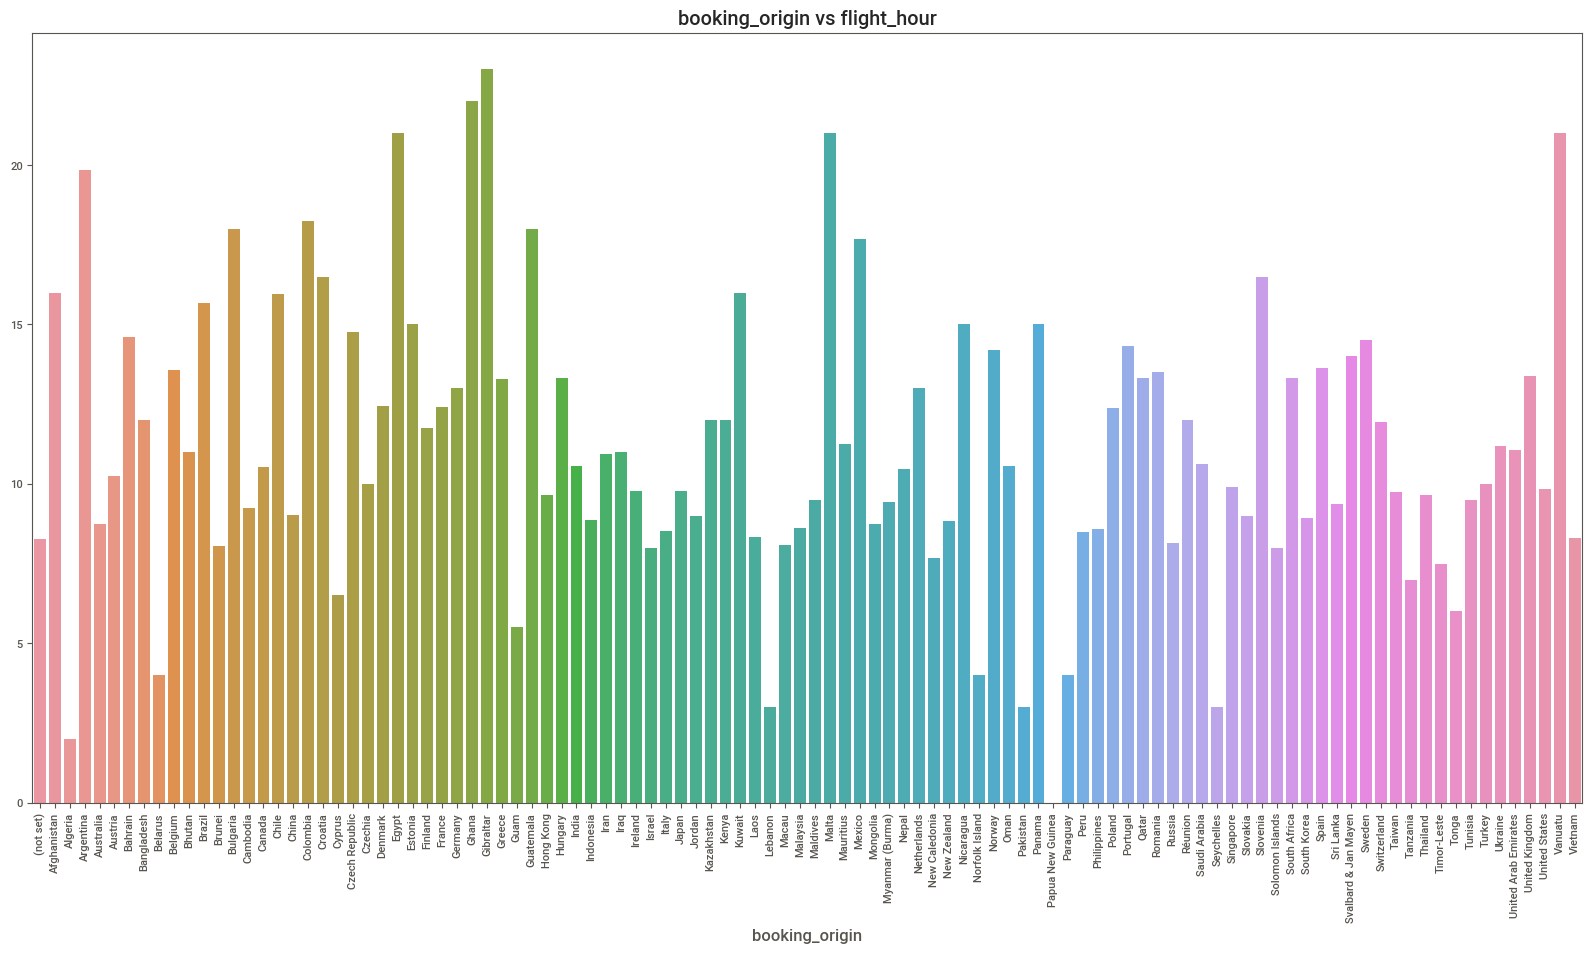

booking_origin
(not set)               0.583333
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.166667
Australia               0.701041
                          ...   
United Arab Emirates    0.642857
United Kingdom          0.693642
United States           0.563596
Vanuatu                 1.000000
Vietnam                 0.724227
Name: wants_extra_baggage, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

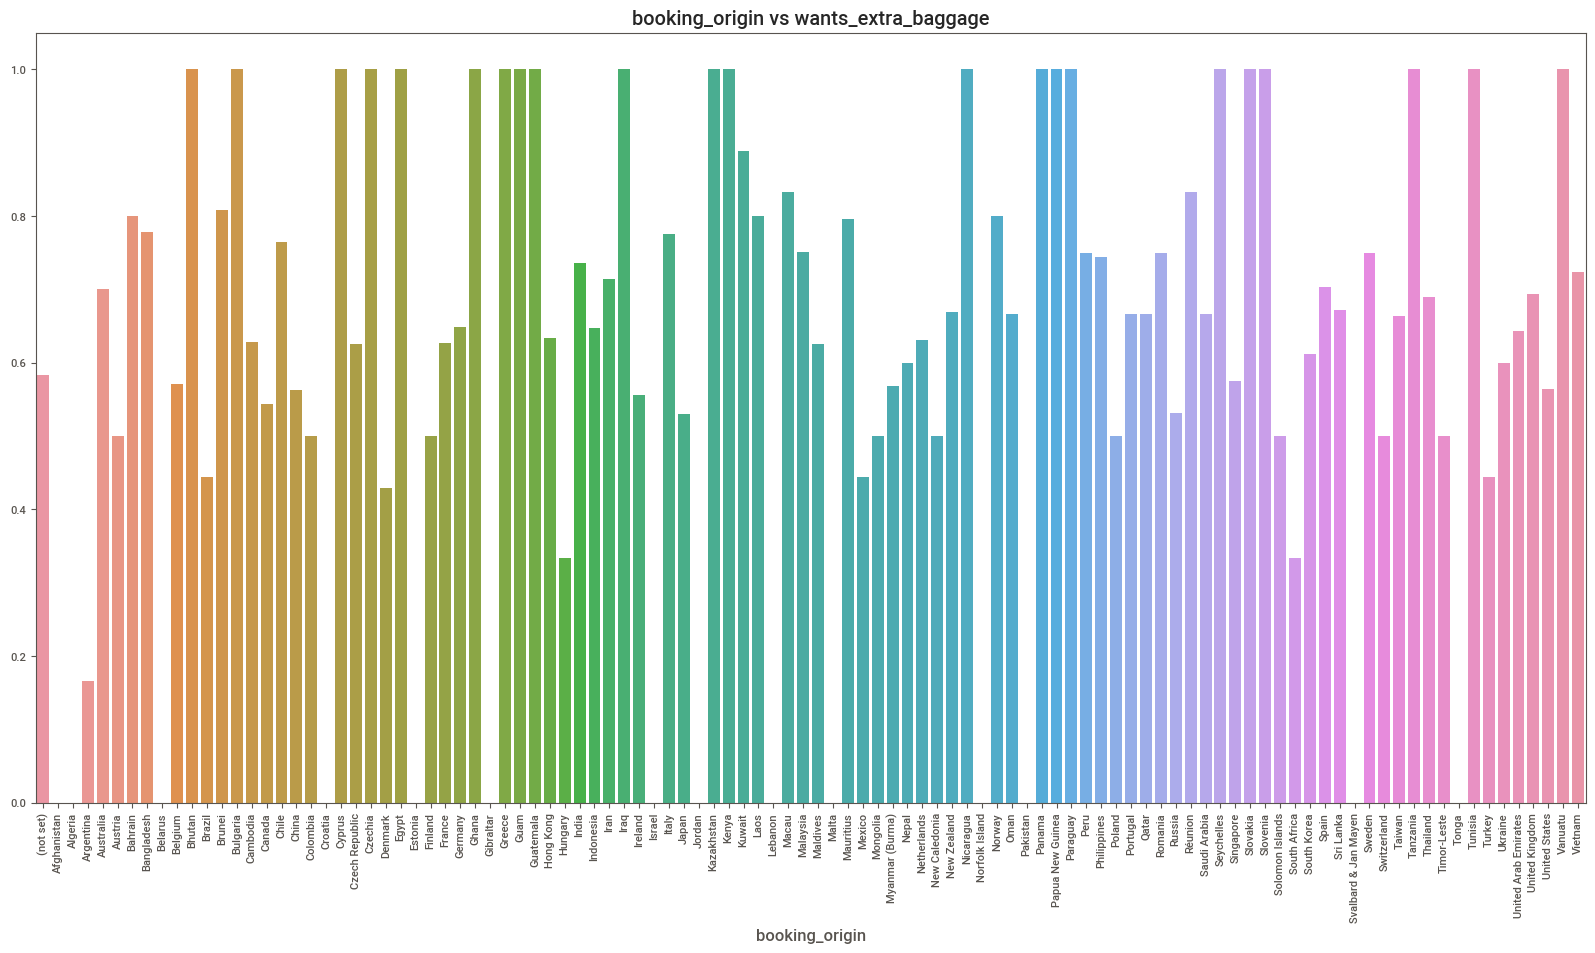

booking_origin
(not set)               0.226190
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.166667
Australia               0.344114
                          ...   
United Arab Emirates    0.357143
United Kingdom          0.323699
United States           0.278509
Vanuatu                 1.000000
Vietnam                 0.273196
Name: wants_preferred_seat, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

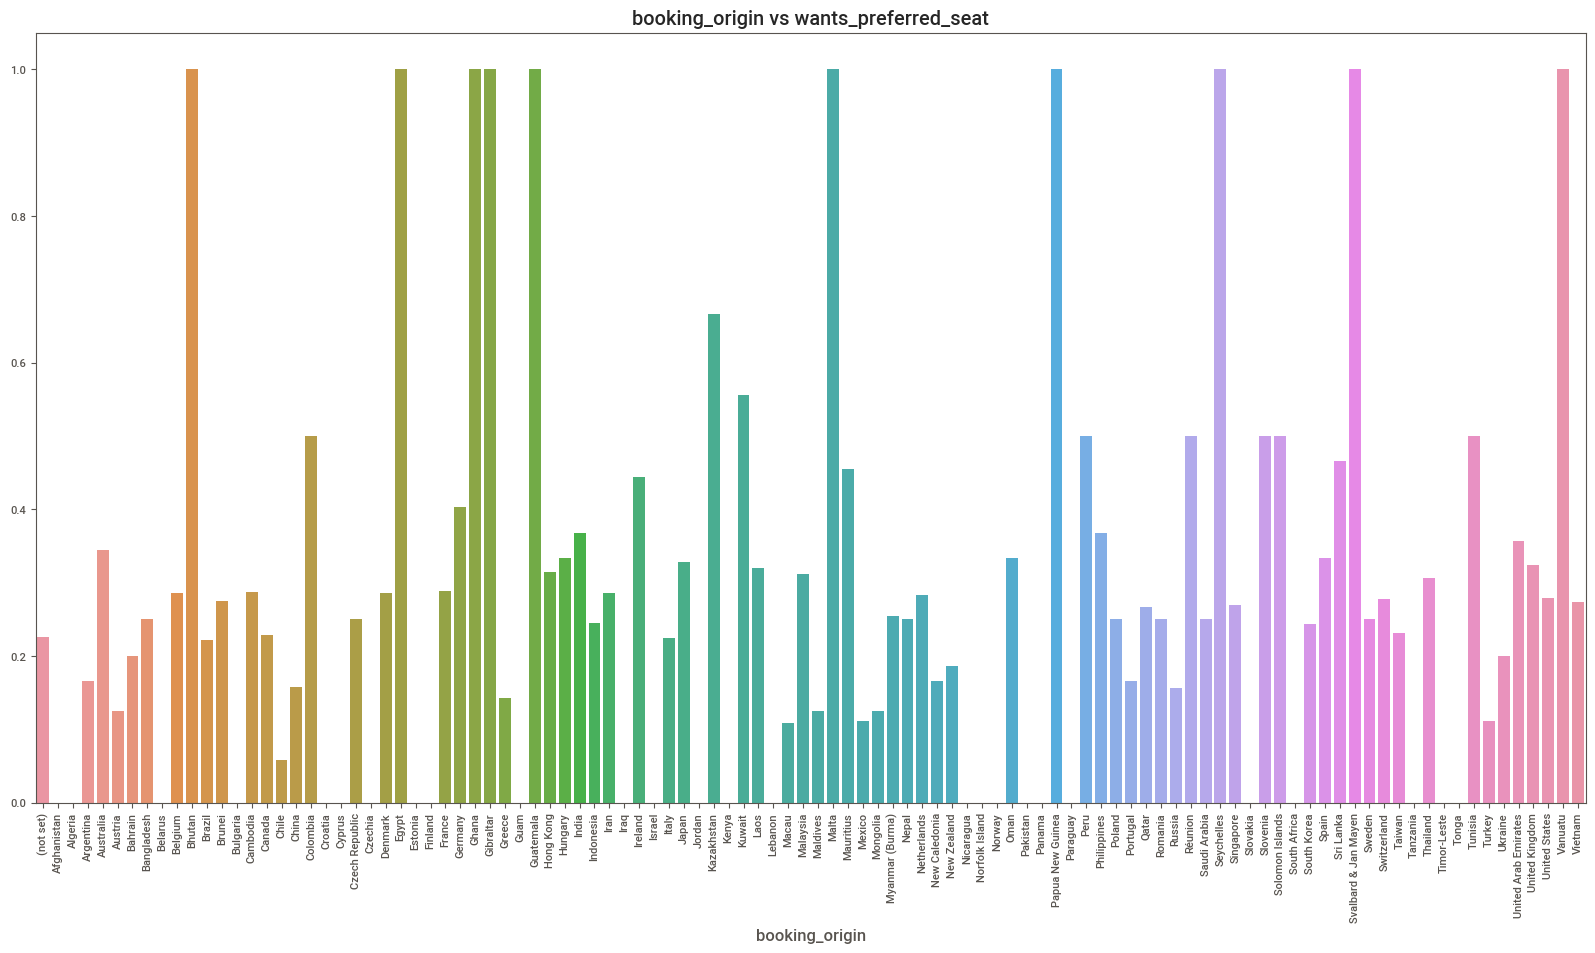

booking_origin
(not set)               0.380952
Afghanistan             0.000000
Algeria                 1.000000
Argentina               0.000000
Australia               0.507386
                          ...   
United Arab Emirates    0.595238
United Kingdom          0.393064
United States           0.315789
Vanuatu                 0.000000
Vietnam                 0.376289
Name: wants_in_flight_meals, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

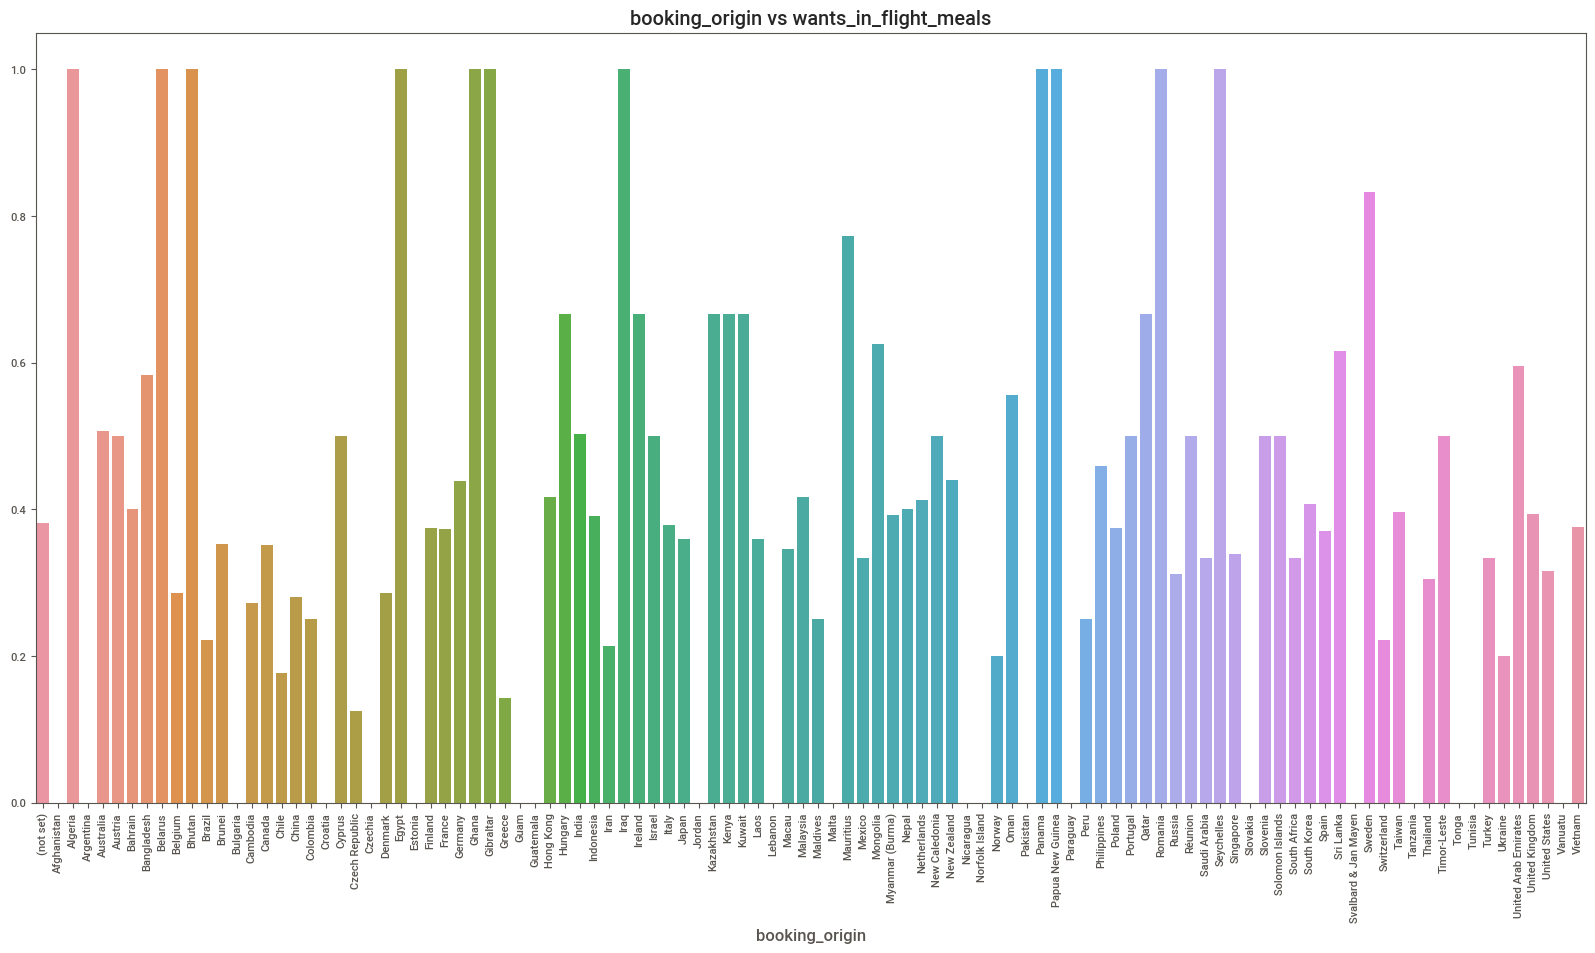

booking_origin
(not set)               6.649762
Afghanistan             4.750000
Algeria                 6.620000
Argentina               7.576667
Australia               7.968687
                          ...   
United Arab Emirates    7.699048
United Kingdom          7.450809
United States           6.883487
Vanuatu                 8.580000
Vietnam                 7.993789
Name: flight_duration, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

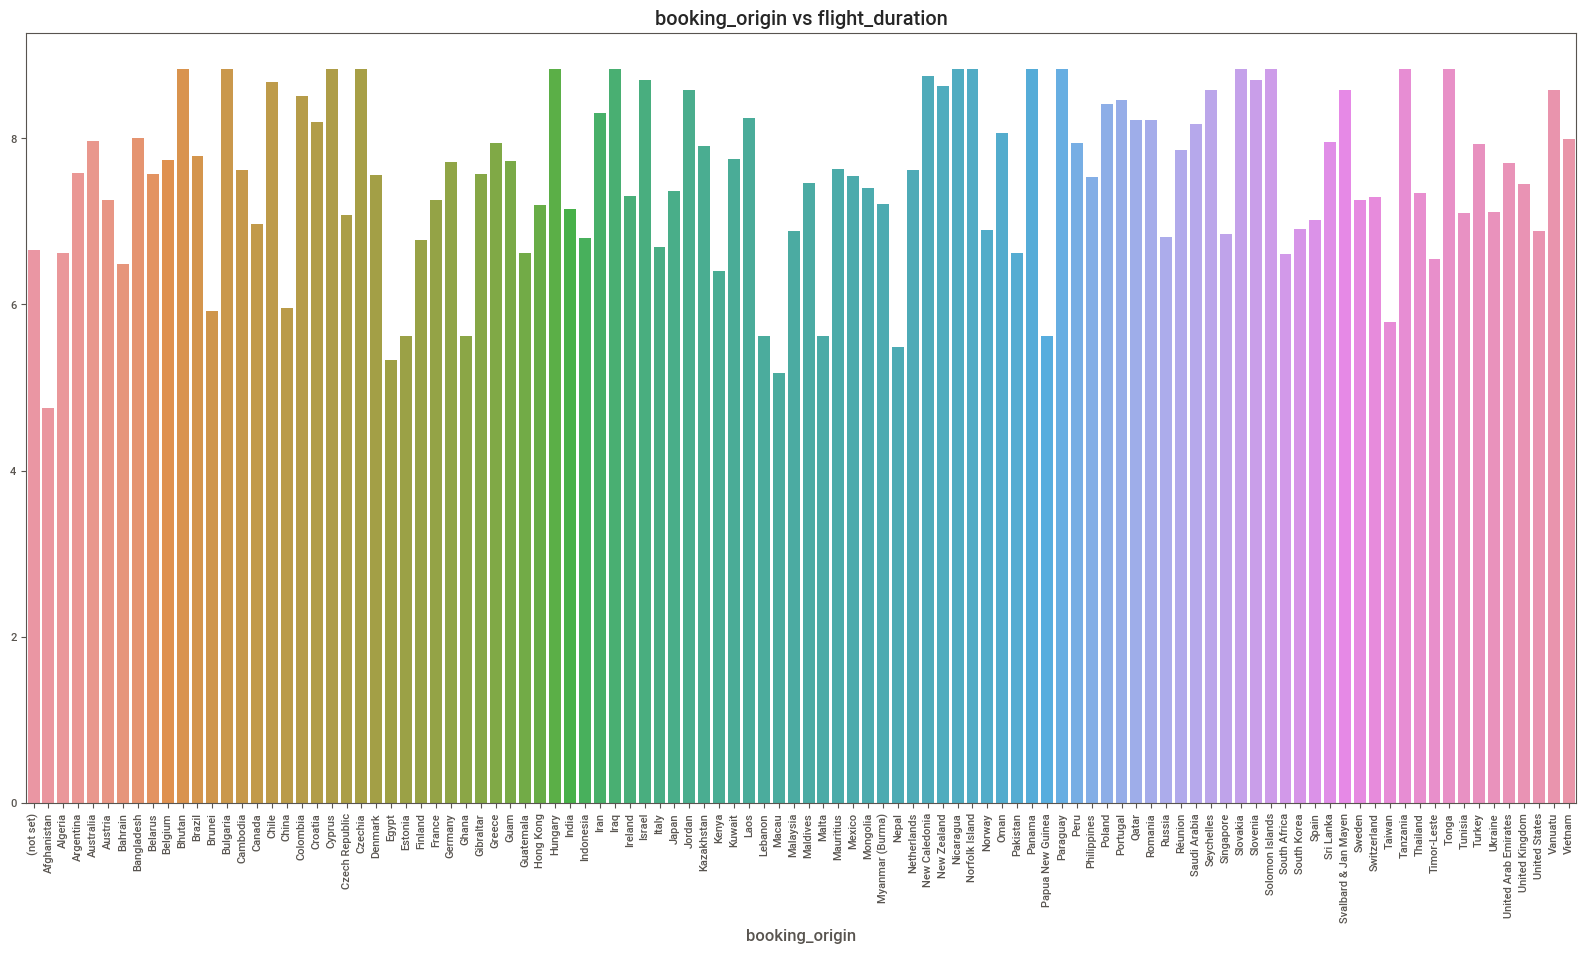

booking_origin
(not set)               0.166667
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.000000
Australia               0.050358
                          ...   
United Arab Emirates    0.071429
United Kingdom          0.121387
United States           0.184211
Vanuatu                 1.000000
Vietnam                 0.293814
Name: booking_complete, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

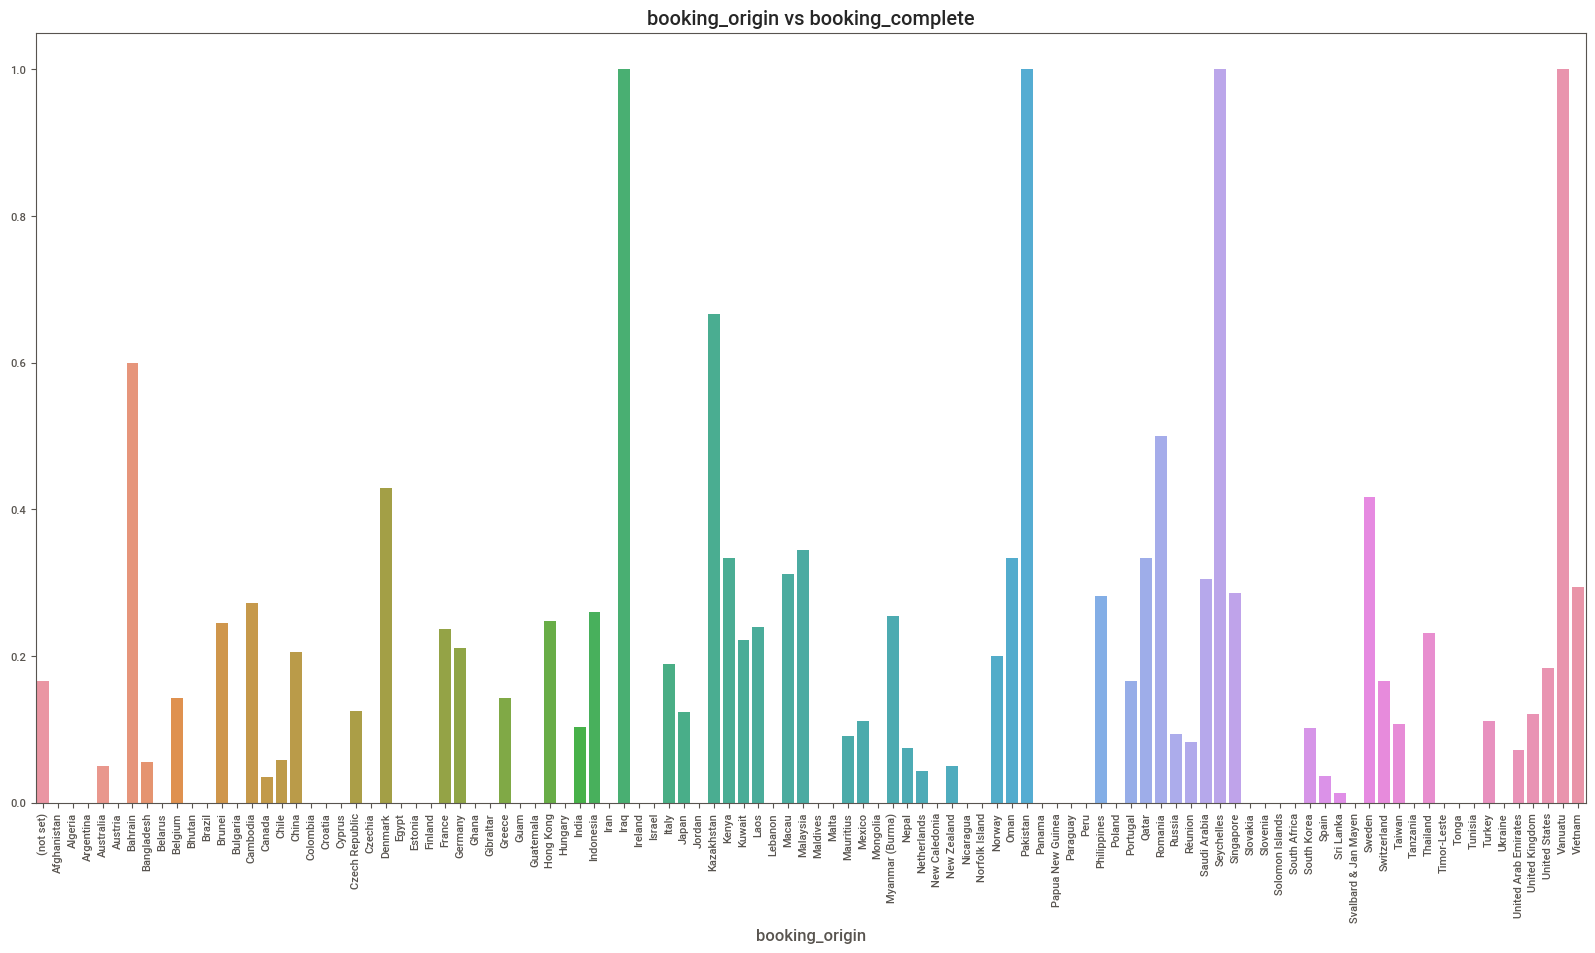

In [12]:
visualize('booking_origin')

flight_day
Fri    1.557166
Mon    1.596273
Sat    1.615107
Sun    1.654257
Thu    1.575835
Tue    1.571093
Wed    1.579098
Name: num_passengers, dtype: float64

<Axes: xlabel='flight_day'>

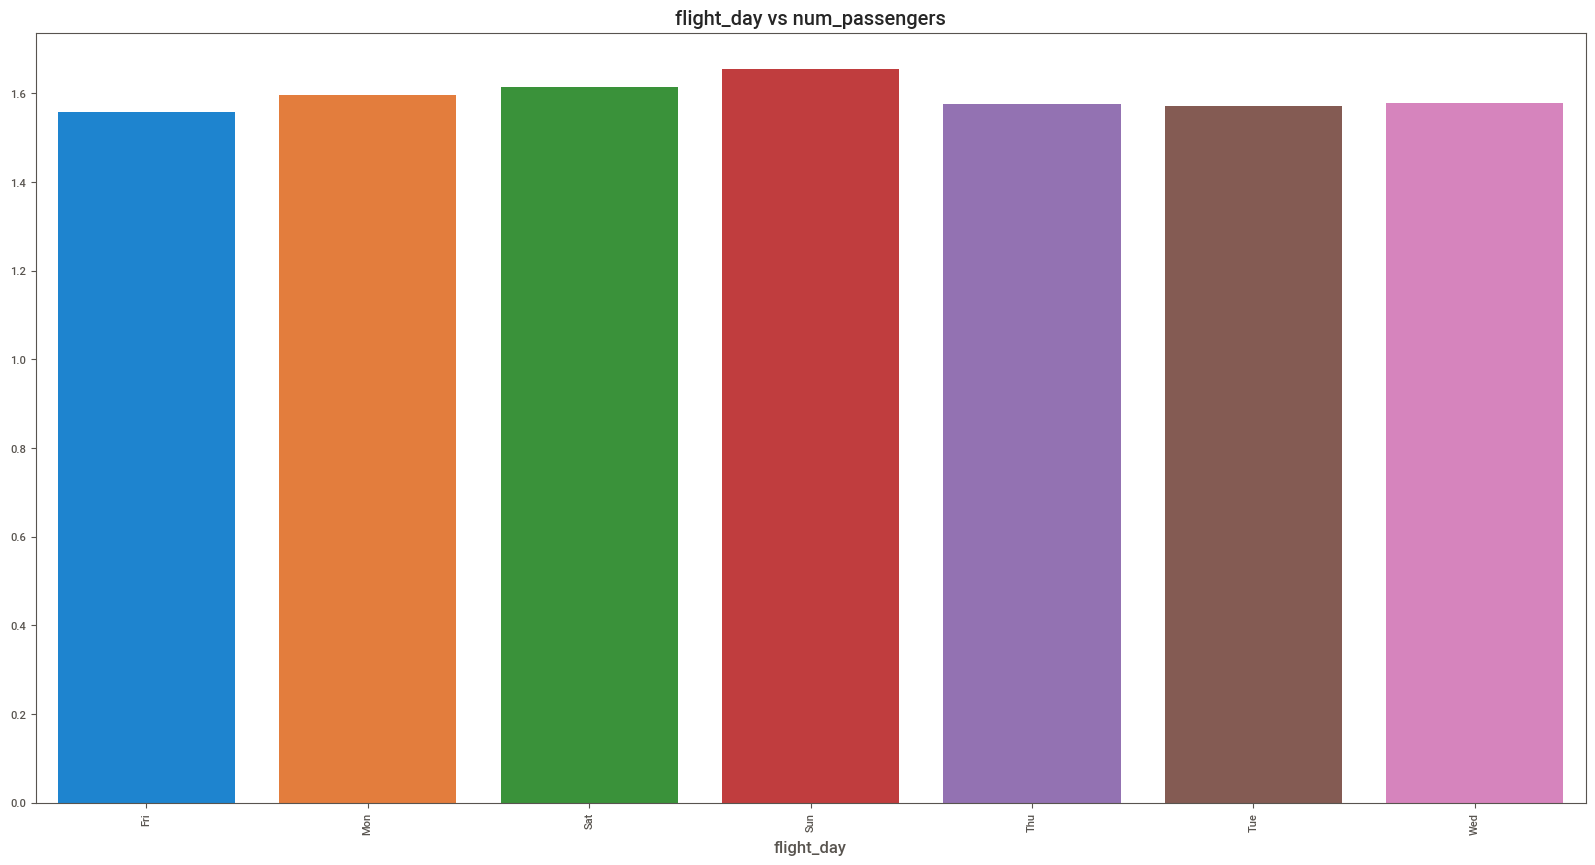

flight_day
Fri     73.955480
Mon     94.251543
Sat     85.706469
Sun    109.916082
Thu     76.335533
Tue     81.759286
Wed     74.382981
Name: purchase_lead, dtype: float64

<Axes: xlabel='flight_day'>

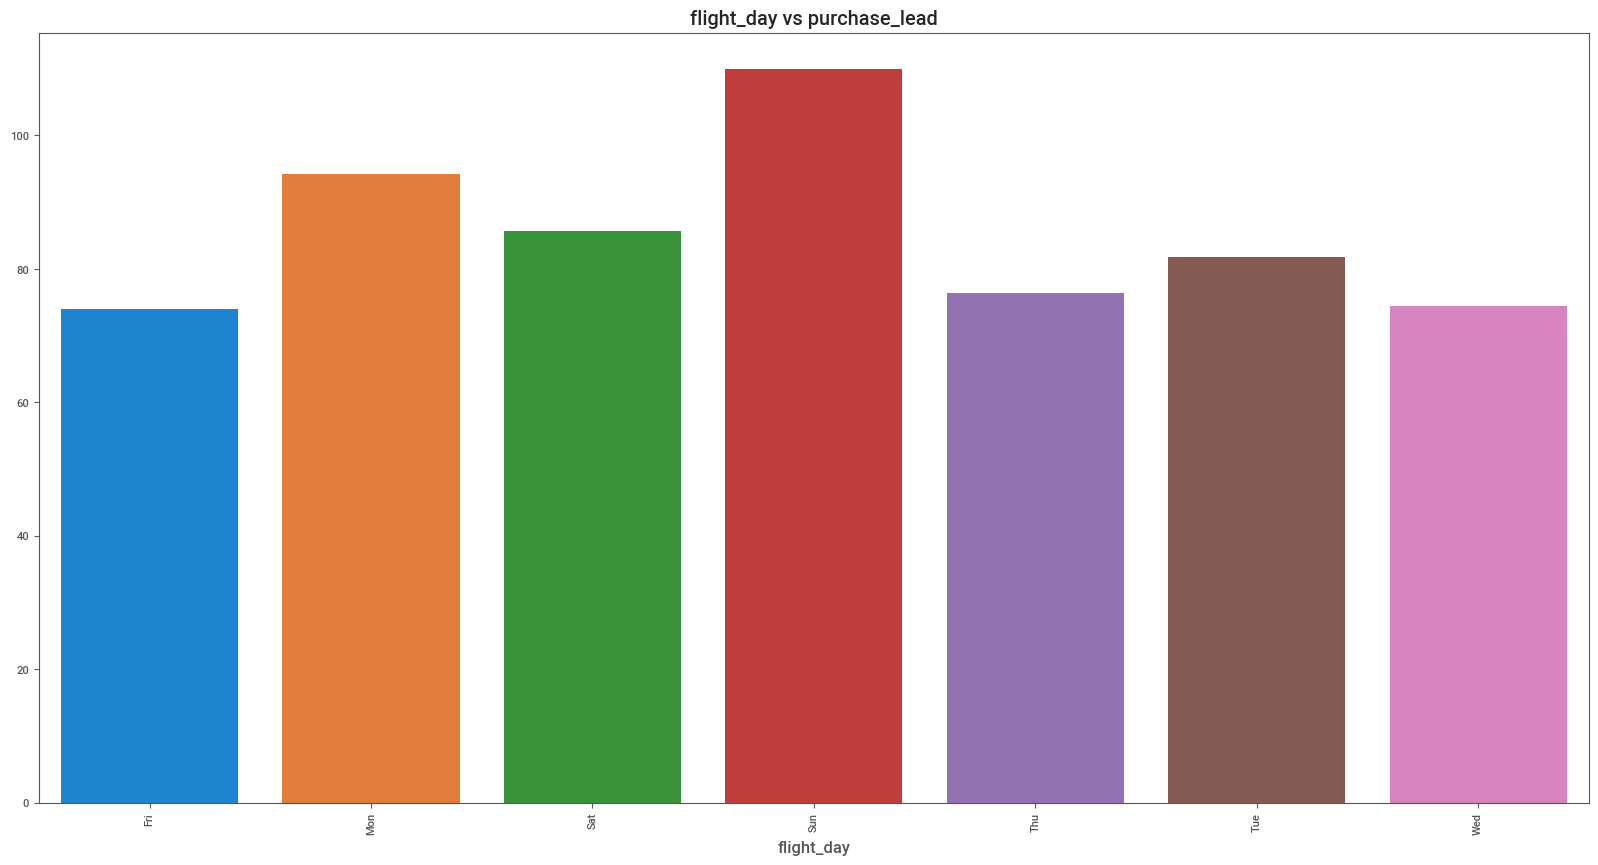

flight_day
Fri    23.318444
Mon    22.571464
Sat    23.126635
Sun    22.484895
Thu    23.469962
Tue    23.348625
Wed    23.002997
Name: length_of_stay, dtype: float64

<Axes: xlabel='flight_day'>

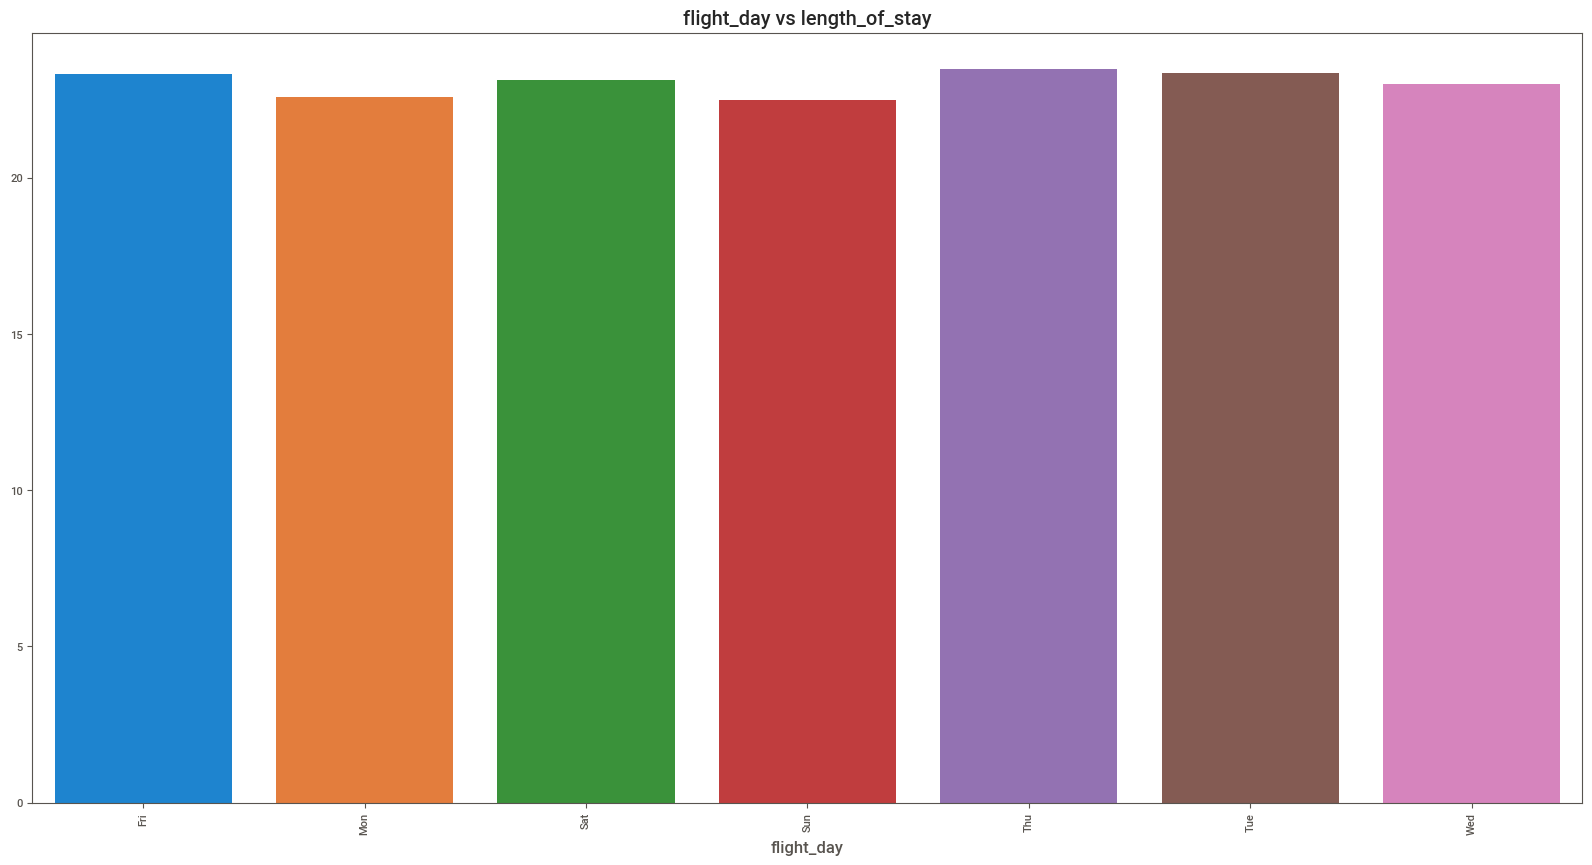

flight_day
Fri    8.769413
Mon    8.998519
Sat    8.985891
Sun    9.730851
Thu    8.996094
Tue    9.013033
Wed    9.014204
Name: flight_hour, dtype: float64

<Axes: xlabel='flight_day'>

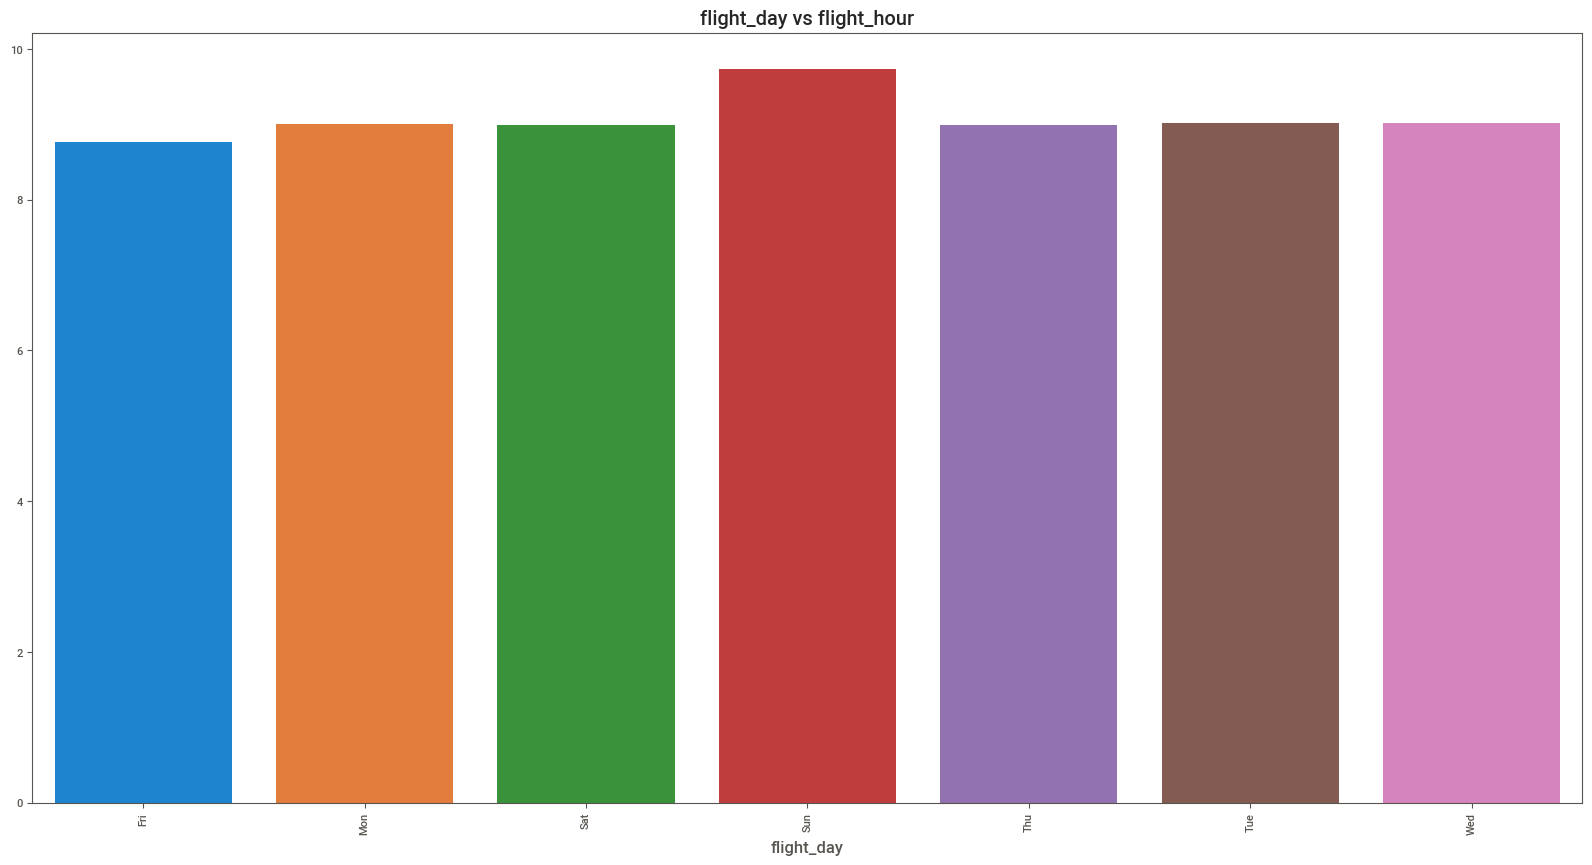

flight_day
Fri    0.667801
Mon    0.663046
Sat    0.673606
Sun    0.658682
Thu    0.671875
Tue    0.673922
Wed    0.672531
Name: wants_extra_baggage, dtype: float64

<Axes: xlabel='flight_day'>

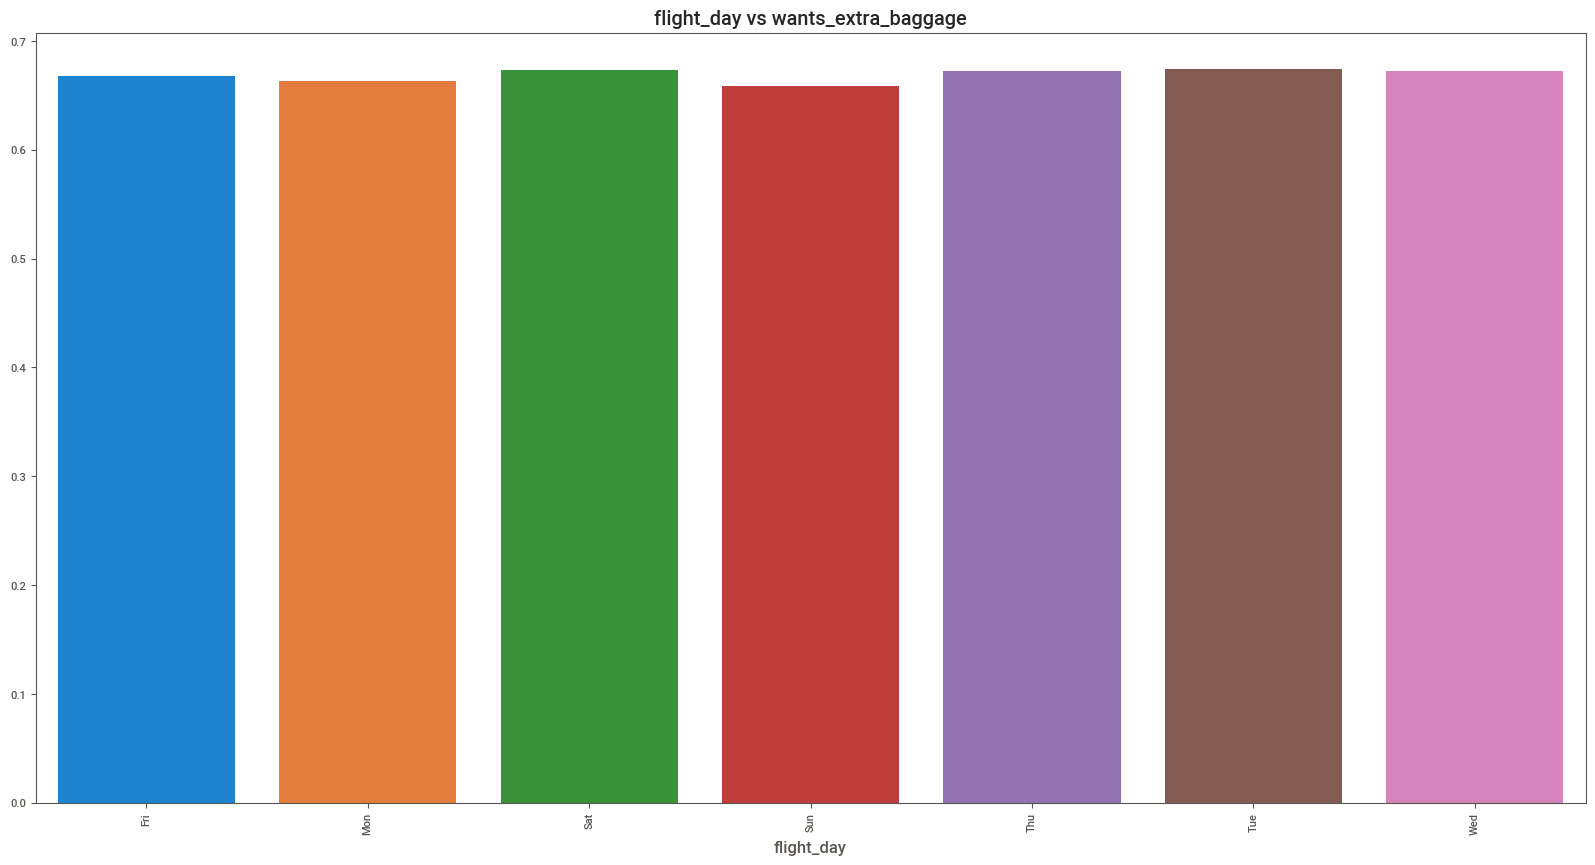

flight_day
Fri    0.291969
Mon    0.304122
Sat    0.307295
Sun    0.305615
Thu    0.286773
Tue    0.284243
Wed    0.301147
Name: wants_preferred_seat, dtype: float64

<Axes: xlabel='flight_day'>

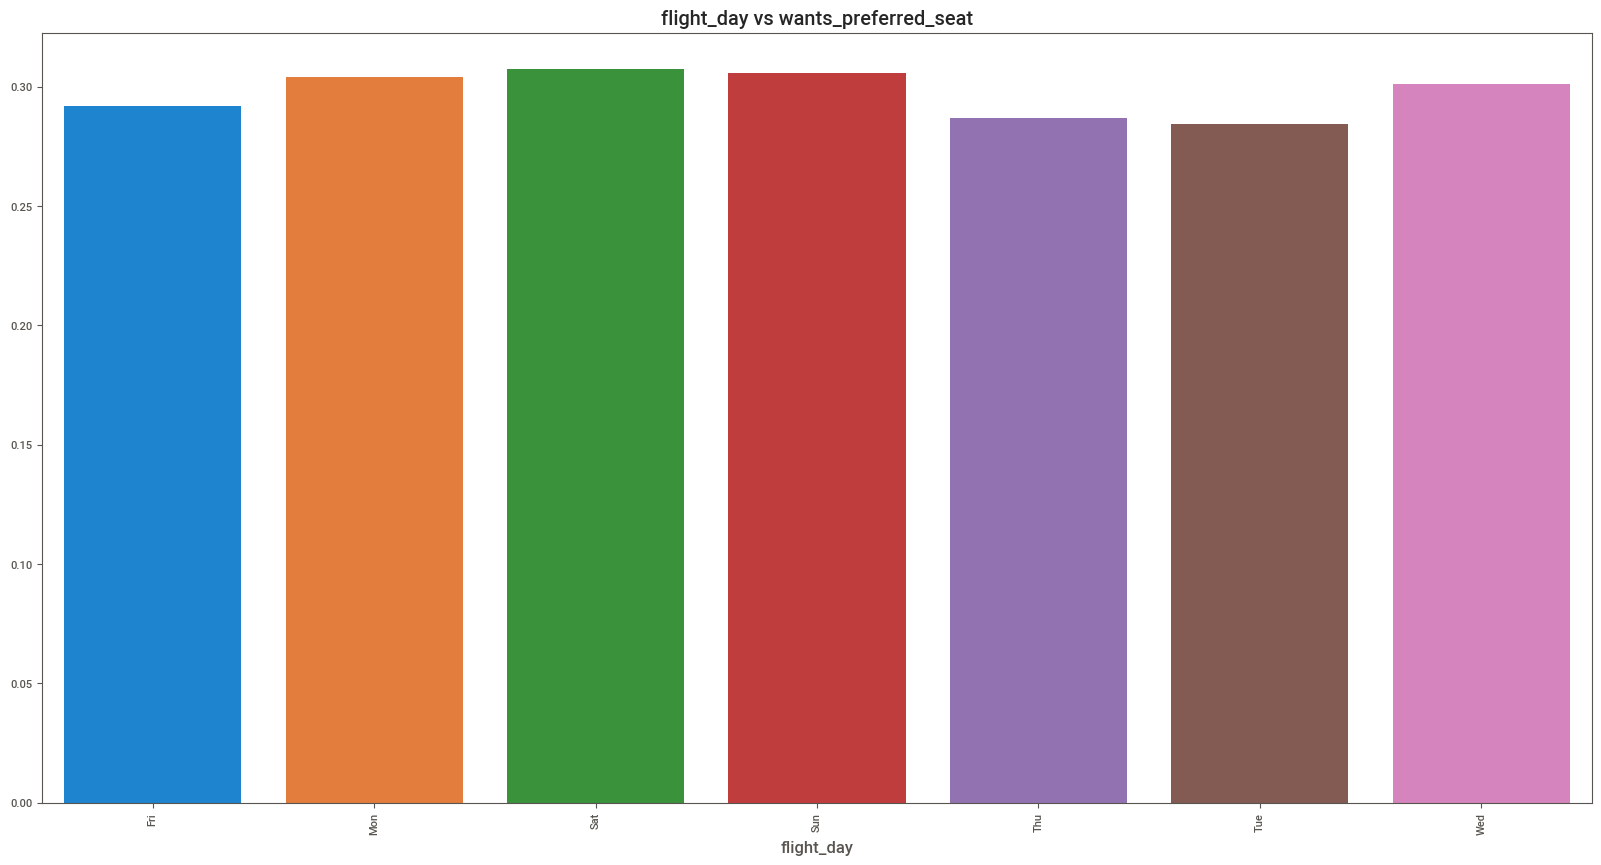

flight_day
Fri    0.433516
Mon    0.422488
Sat    0.432725
Sun    0.430577
Thu    0.431708
Tue    0.417438
Wed    0.424550
Name: wants_in_flight_meals, dtype: float64

<Axes: xlabel='flight_day'>

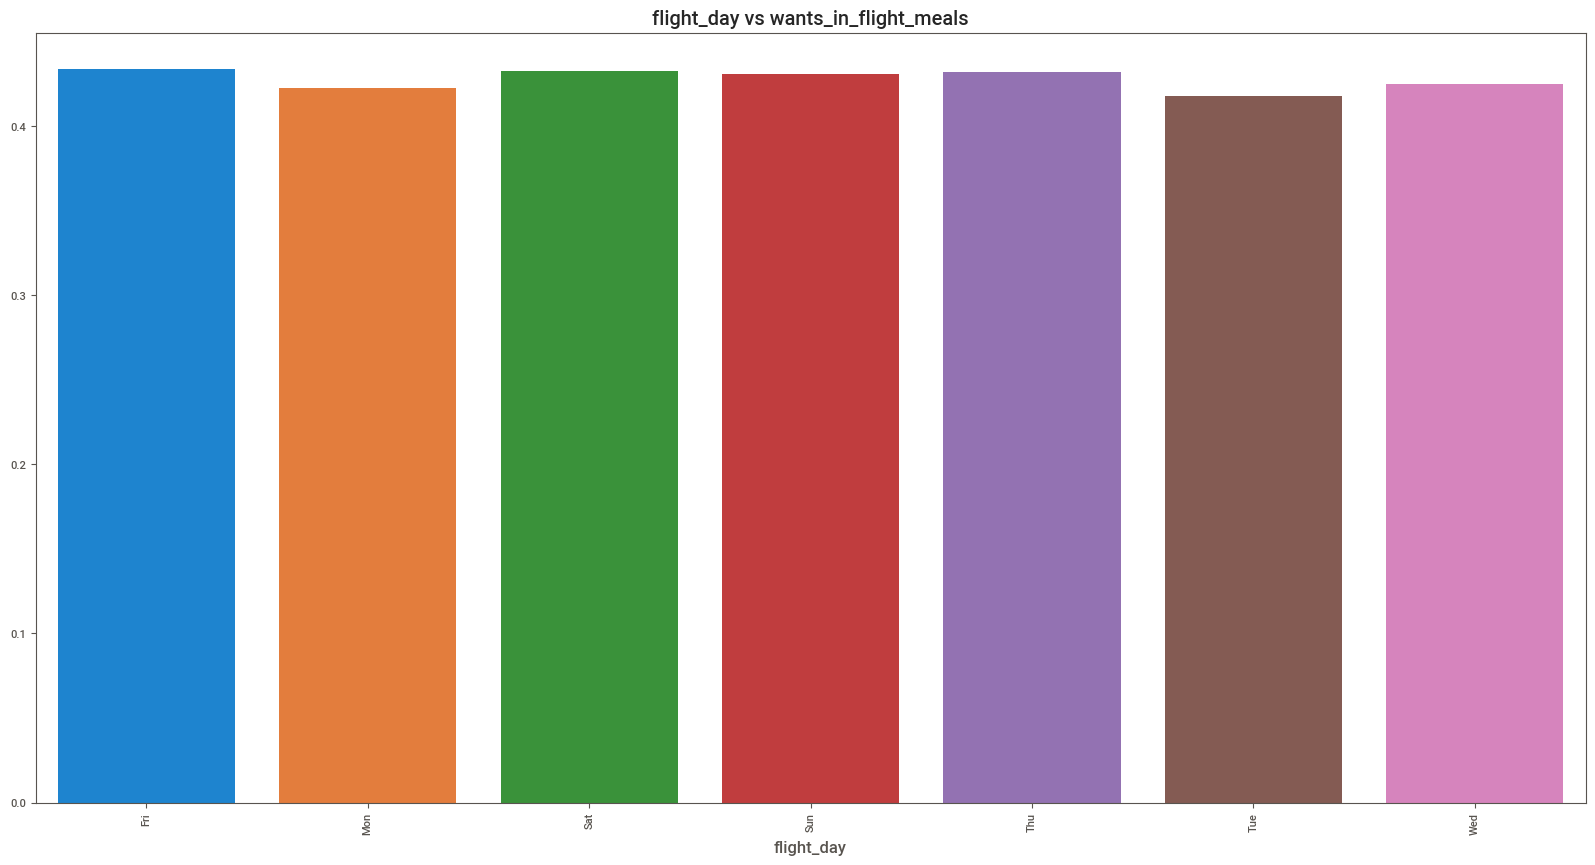

flight_day
Fri    7.249762
Mon    7.264668
Sat    7.302612
Sun    7.374352
Thu    7.249425
Tue    7.257900
Wed    7.260904
Name: flight_duration, dtype: float64

<Axes: xlabel='flight_day'>

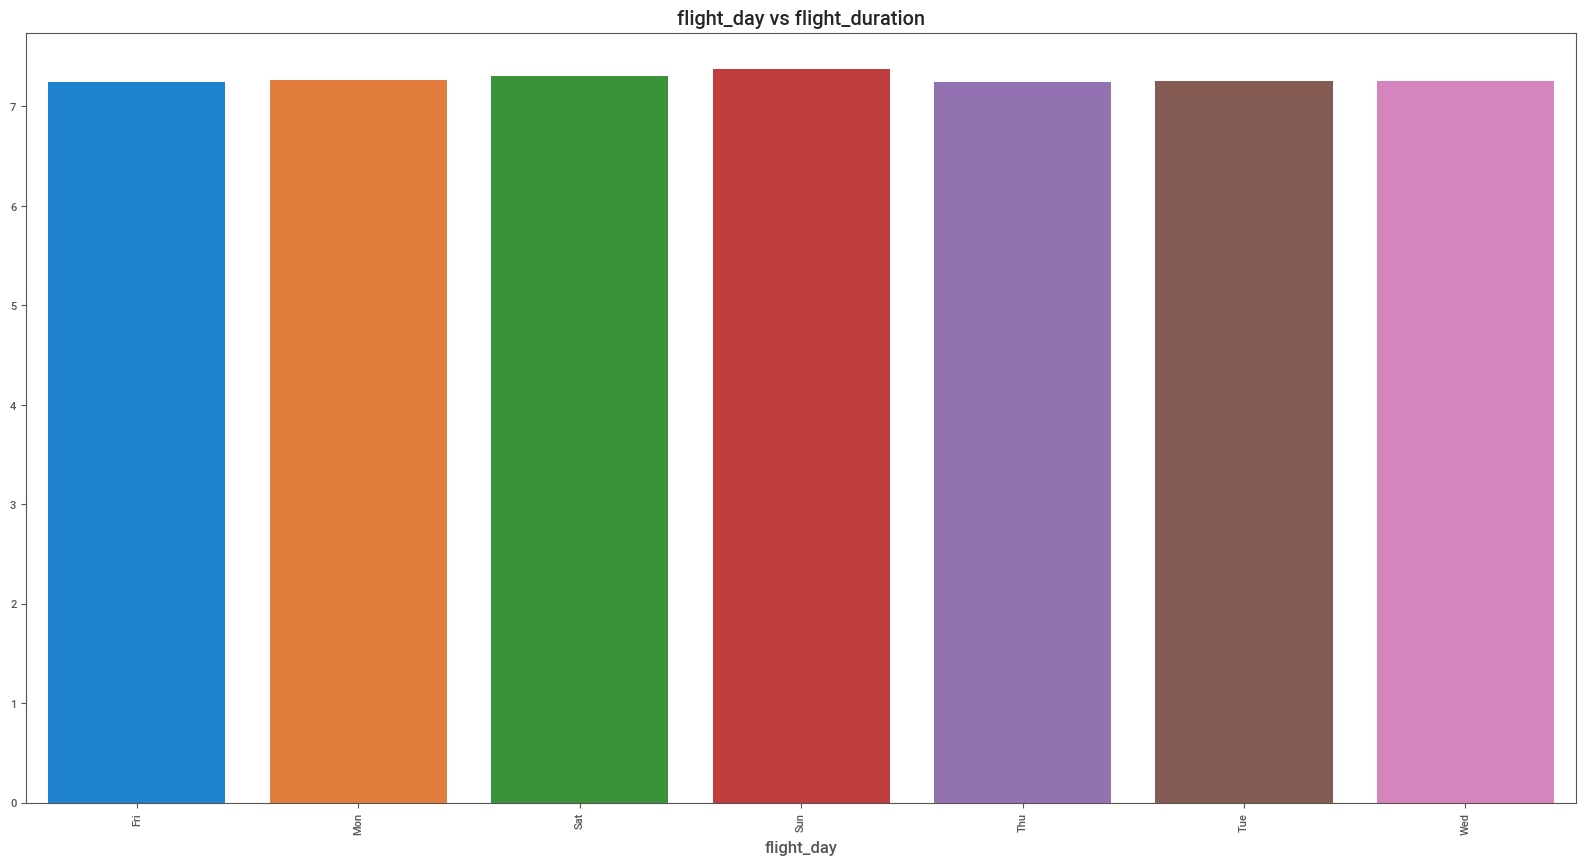

flight_day
Fri    0.145393
Mon    0.148605
Sat    0.148142
Sun    0.141440
Thu    0.151131
Tue    0.147139
Wed    0.163148
Name: booking_complete, dtype: float64

<Axes: xlabel='flight_day'>

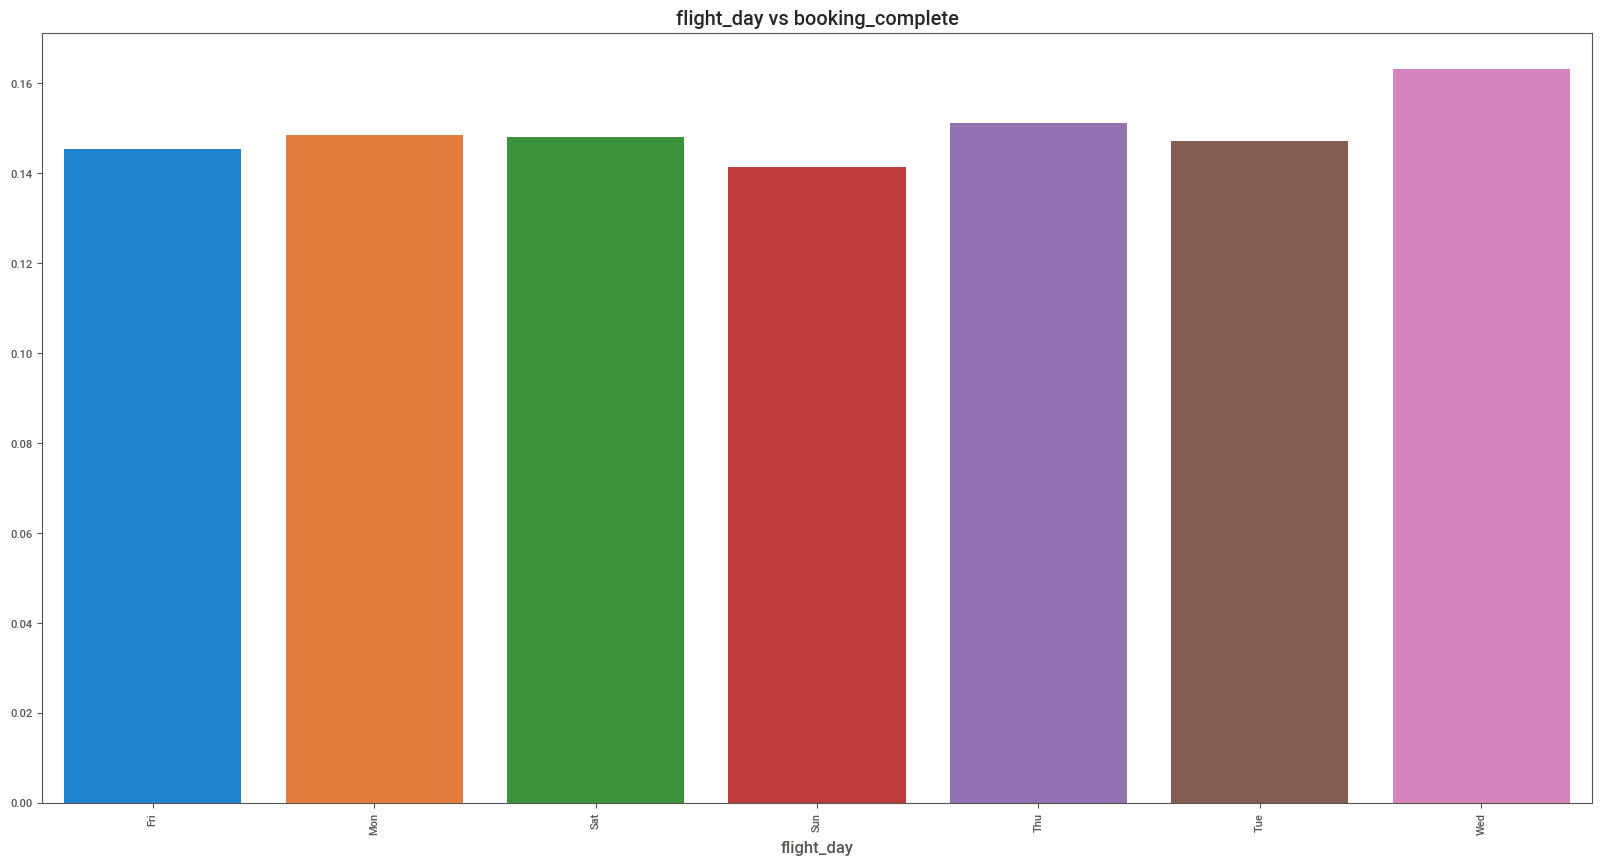

In [13]:
visualize('flight_day')

In [14]:
isualize('trip_type')

NameError: ignored

sales_channel
Internet    1.592132
Mobile      1.584194
Name: num_passengers, dtype: float64

<BarContainer object of 2 artists>

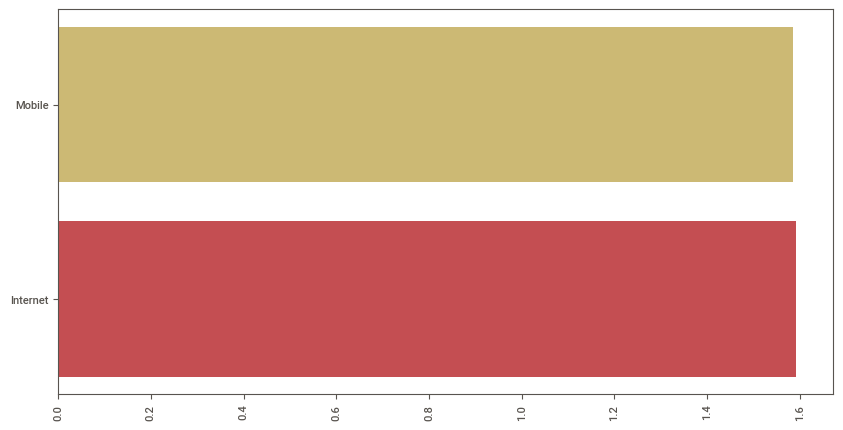

sales_channel
Internet    85.371682
Mobile      81.533998
Name: purchase_lead, dtype: float64

<BarContainer object of 2 artists>

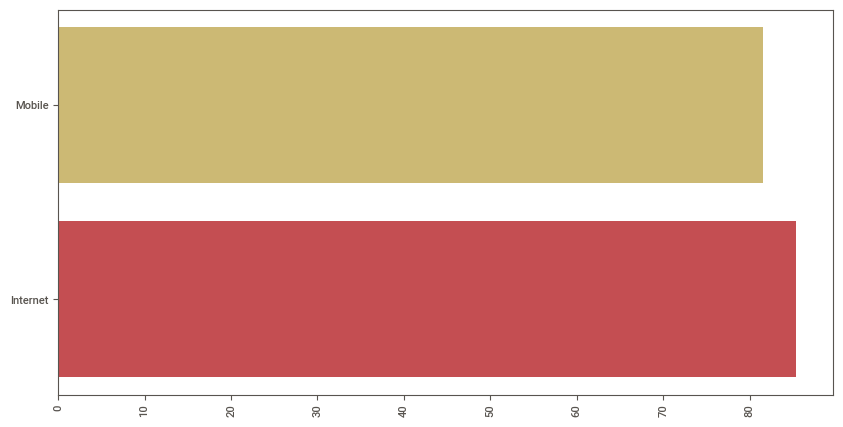

sales_channel
Internet    23.772205
Mobile      17.296191
Name: length_of_stay, dtype: float64

<BarContainer object of 2 artists>

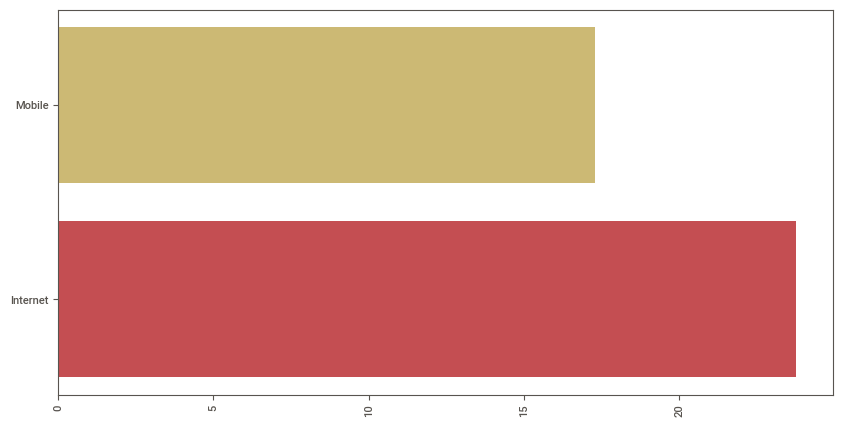

sales_channel
Internet    9.023253
Mobile      9.406728
Name: flight_hour, dtype: float64

<BarContainer object of 2 artists>

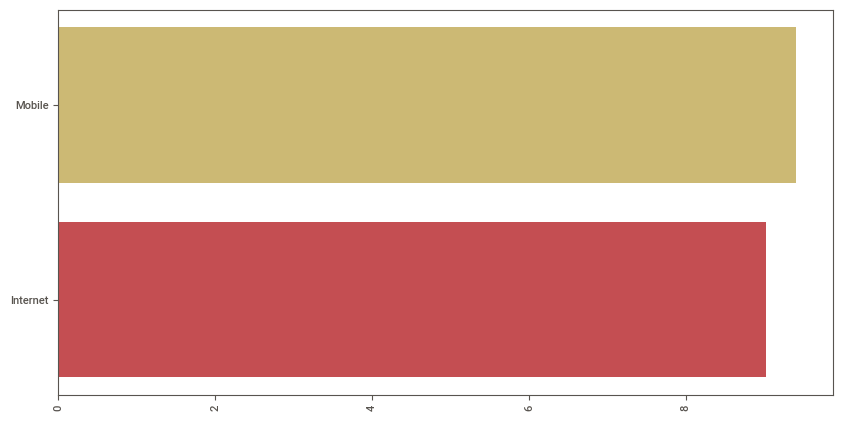

sales_channel
Internet    0.677865
Mobile      0.597010
Name: wants_extra_baggage, dtype: float64

<BarContainer object of 2 artists>

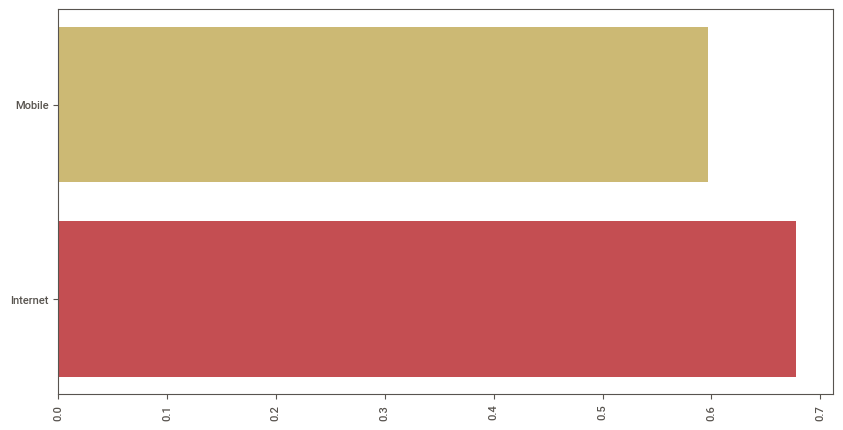

sales_channel
Internet    0.291605
Mobile      0.339267
Name: wants_preferred_seat, dtype: float64

<BarContainer object of 2 artists>

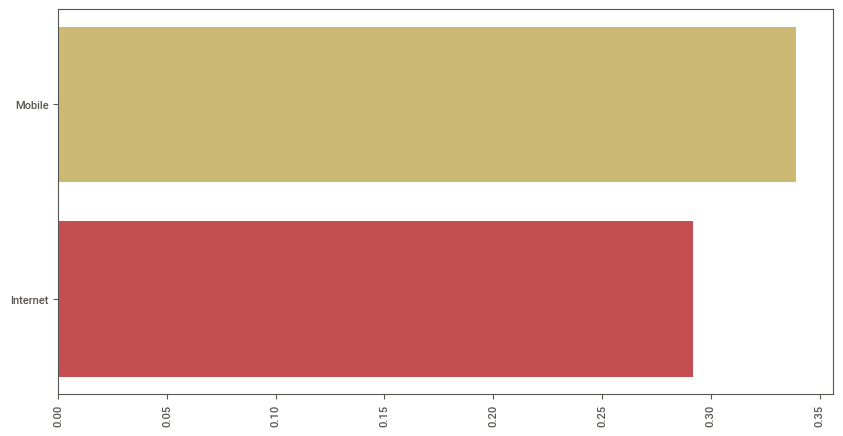

sales_channel
Internet    0.431053
Mobile      0.396226
Name: wants_in_flight_meals, dtype: float64

<BarContainer object of 2 artists>

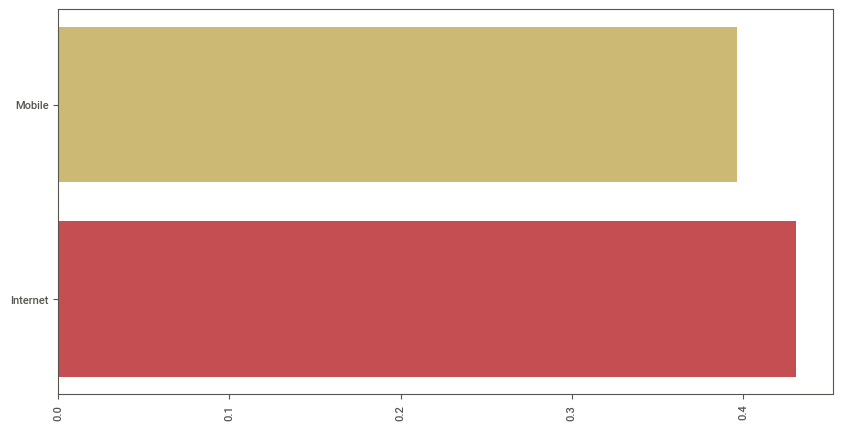

sales_channel
Internet    7.298133
Mobile      7.115043
Name: flight_duration, dtype: float64

<BarContainer object of 2 artists>

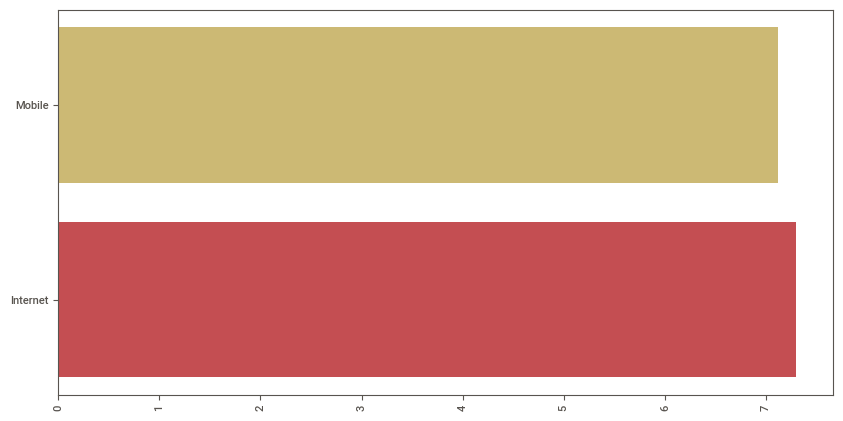

sales_channel
Internet    0.154770
Mobile      0.108402
Name: booking_complete, dtype: float64

<BarContainer object of 2 artists>

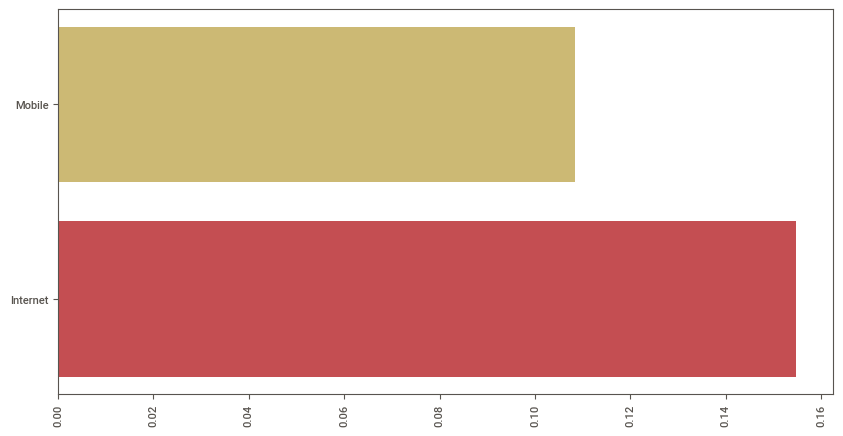

In [15]:
for i in df.select_dtypes(exclude='object').columns:
  display(df.groupby('sales_channel')[i].mean())
  plt.figure(figsize=(10,5))
  display(plt.barh(df.groupby('sales_channel')[i].mean().index,df.groupby('sales_channel')[i].mean().values,color=['r','y']))
  plt.xticks(rotation=90)
  plt.show()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

<Axes: >

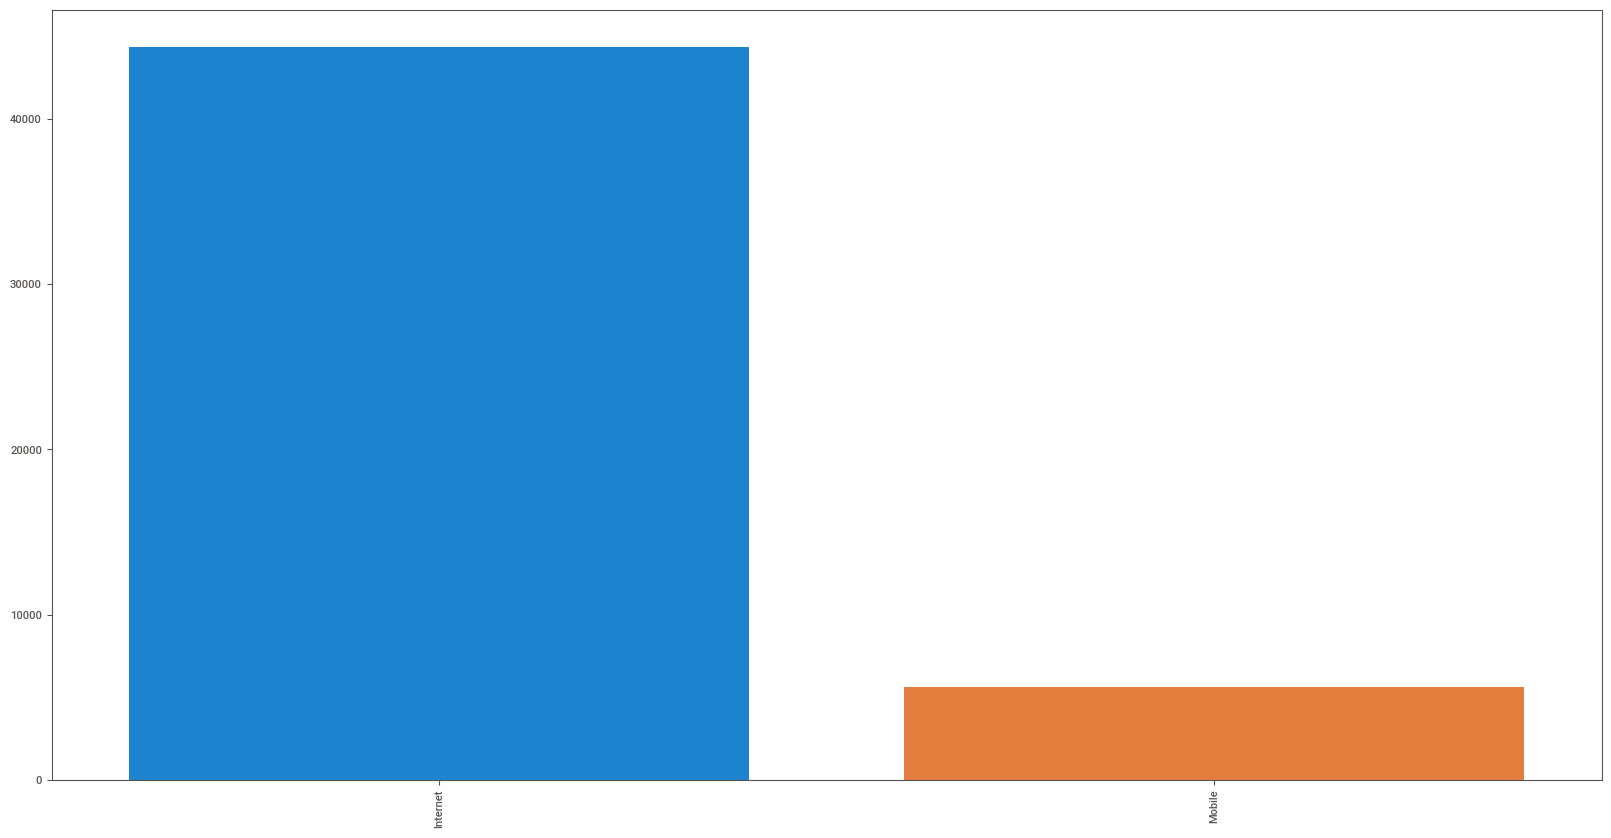

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

<Axes: >

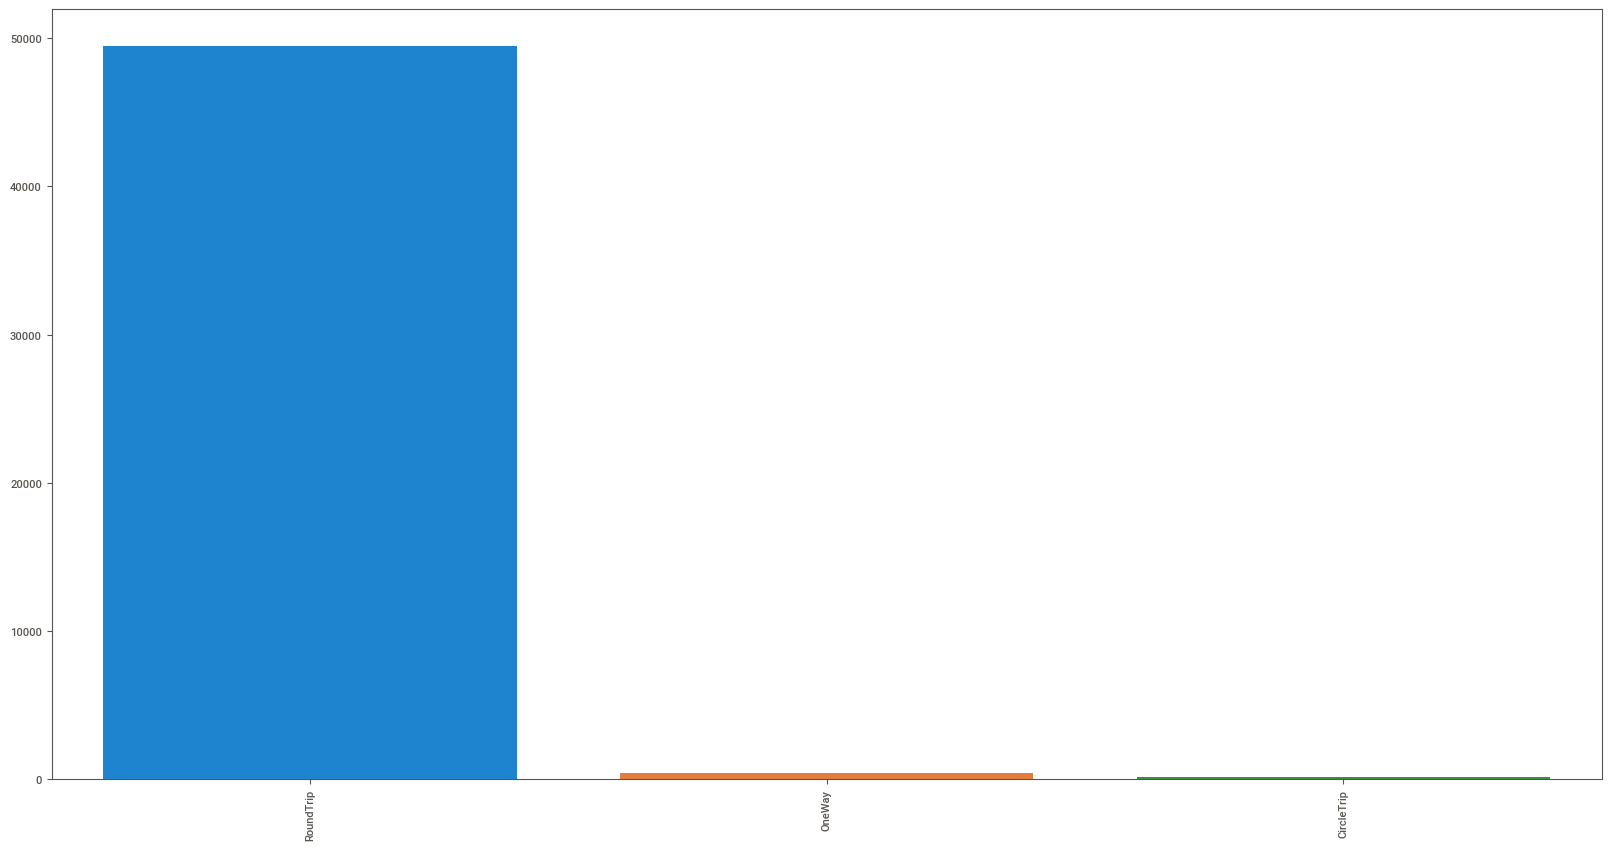

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

<Axes: >

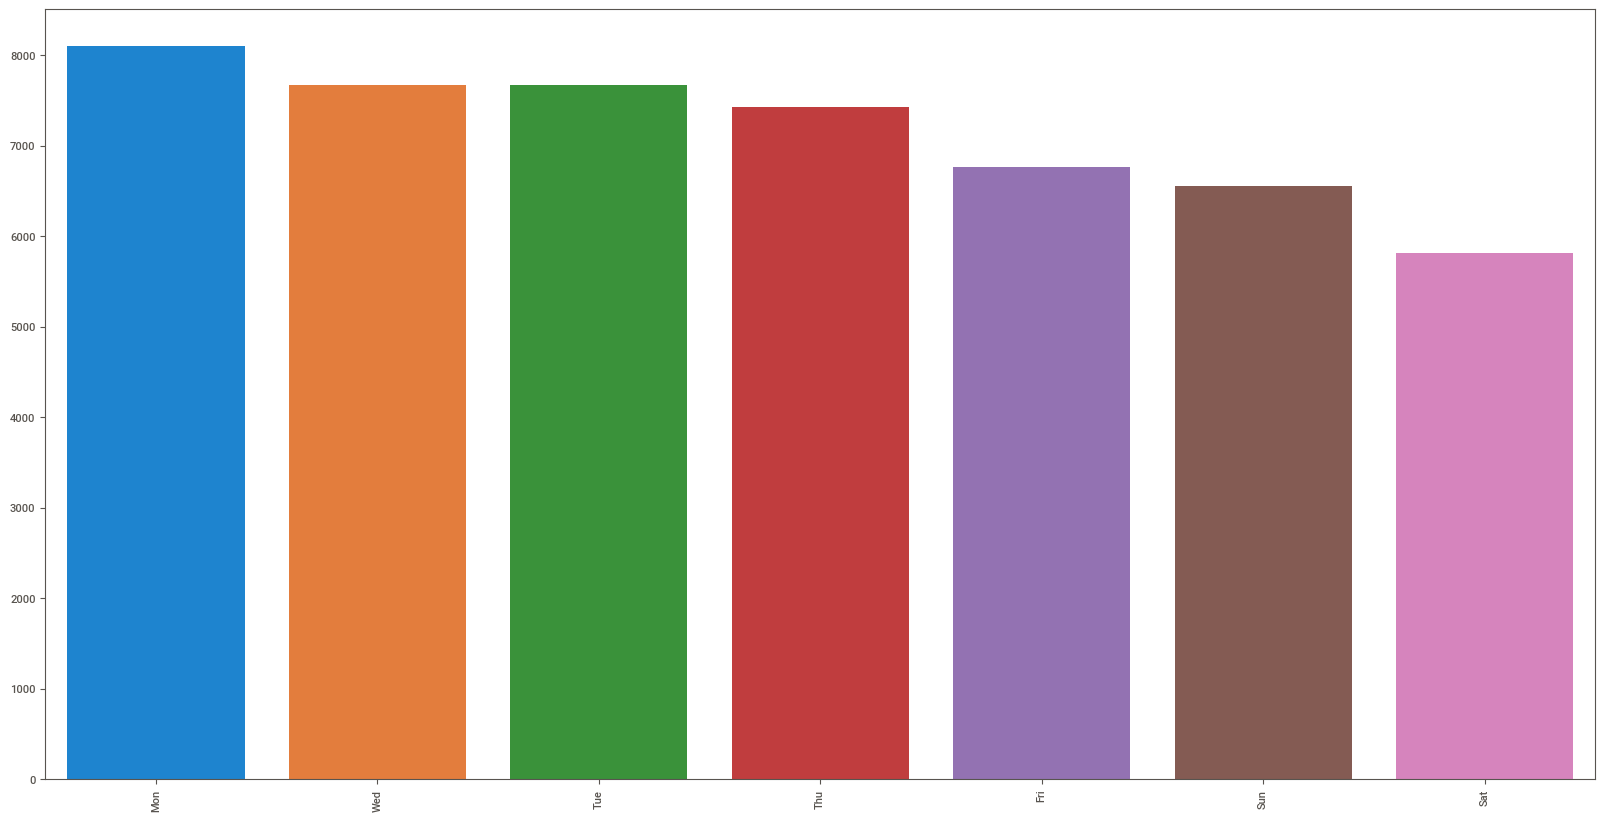

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

<Axes: >

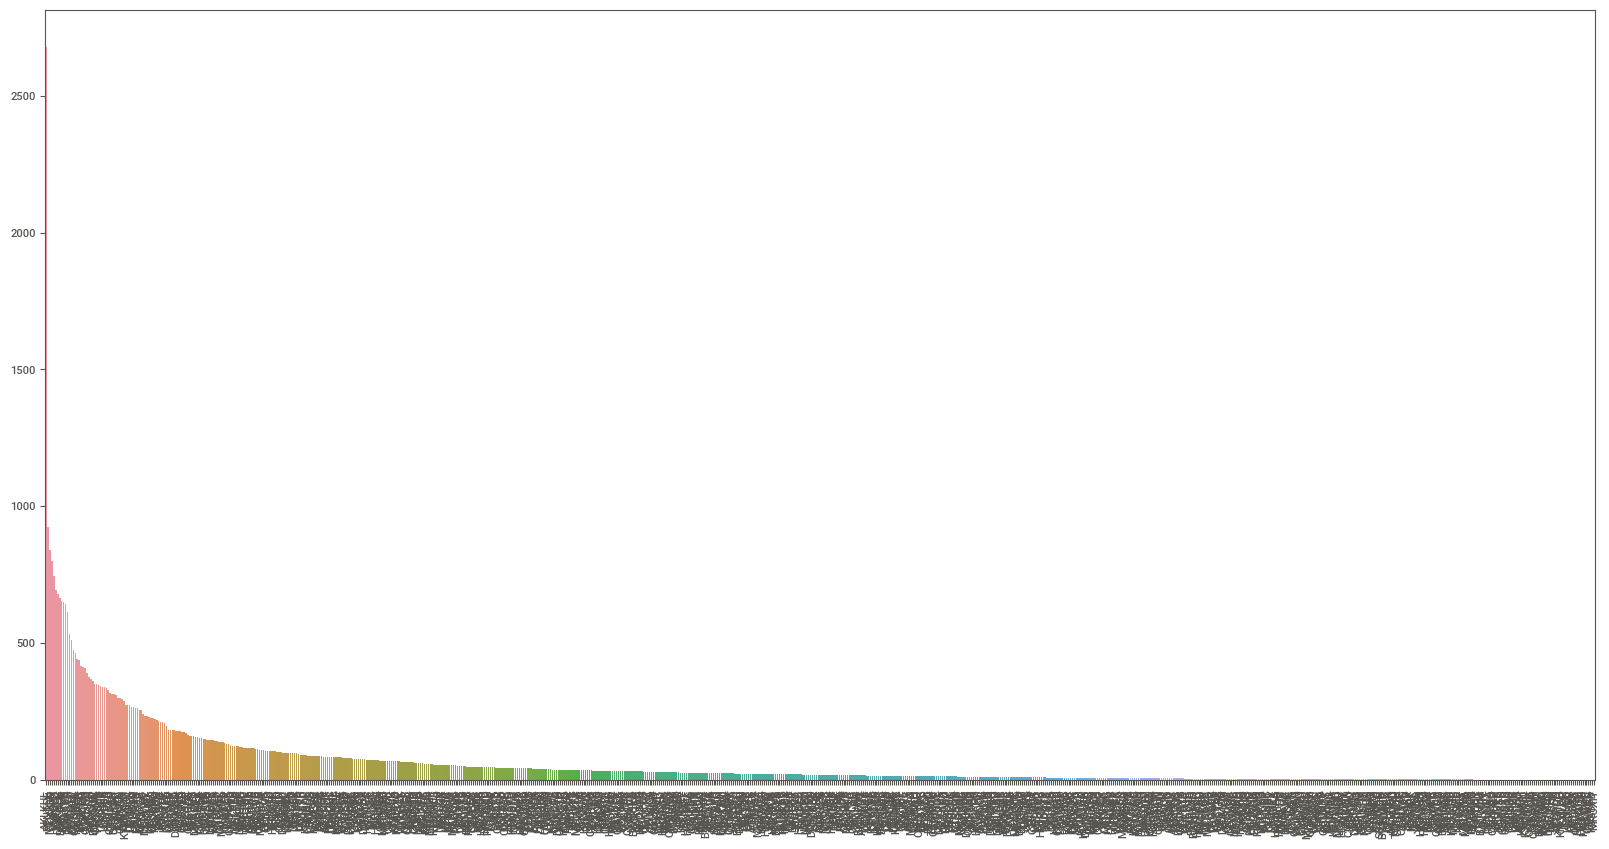

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

<Axes: >

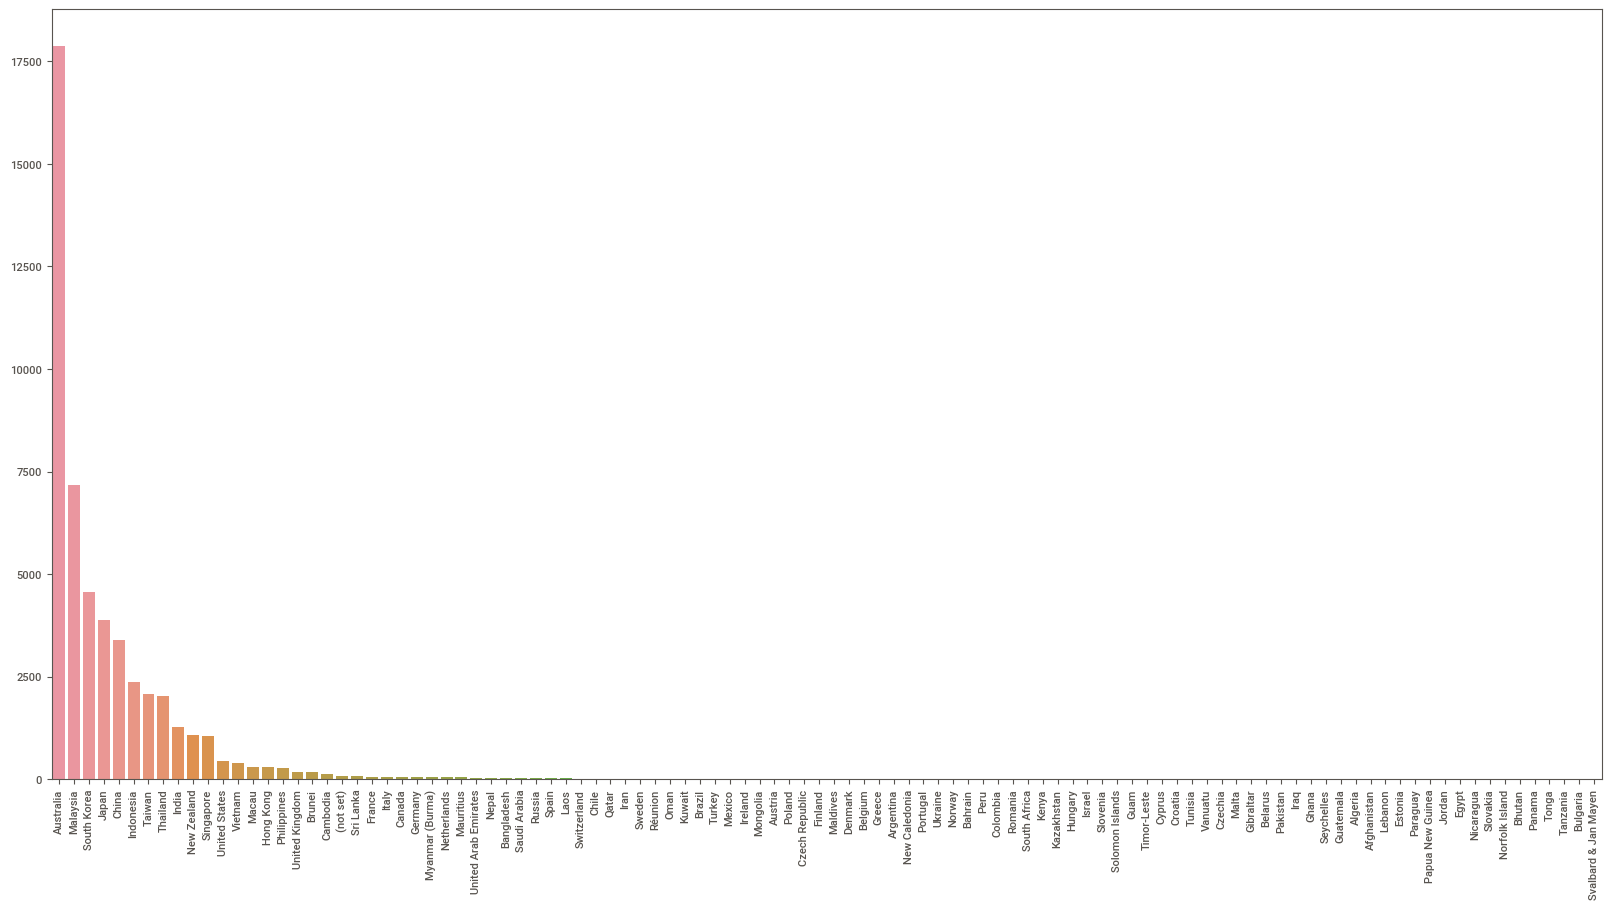

In [16]:
for i in df.select_dtypes(include='object').columns:
  display(df.select_dtypes(include='object')[i].value_counts())
  plt.figure(figsize=(20,10))
  display(sns.barplot(x=df.select_dtypes(include='object')[i].value_counts().index,y=df.select_dtypes(include='object')[i].value_counts().values))
  plt.xticks(rotation=90)
  plt.show()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

<Axes: >

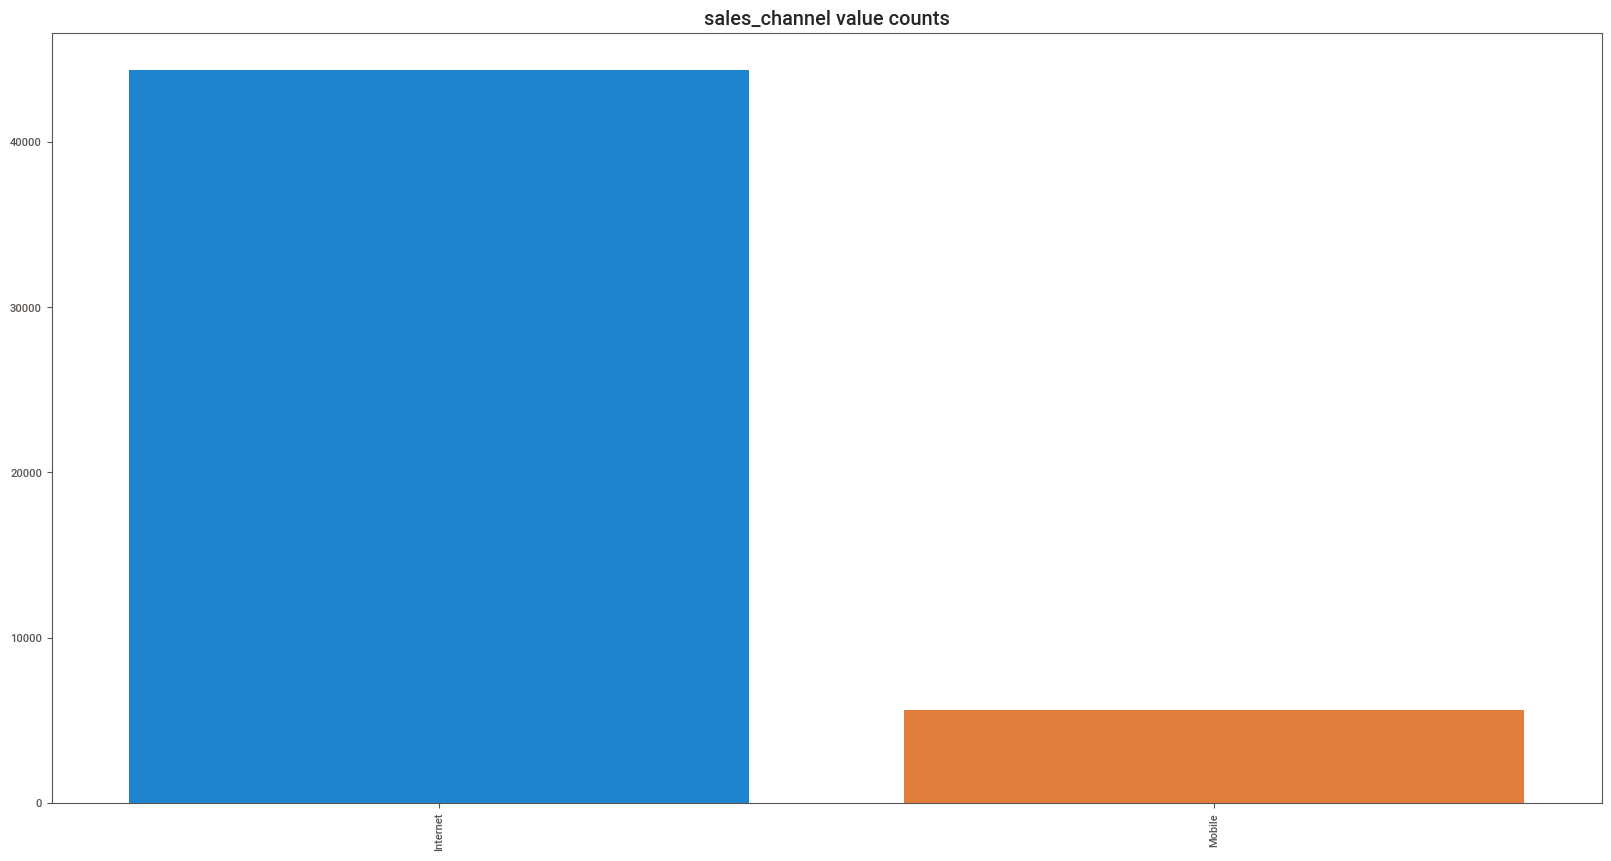

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

<Axes: >

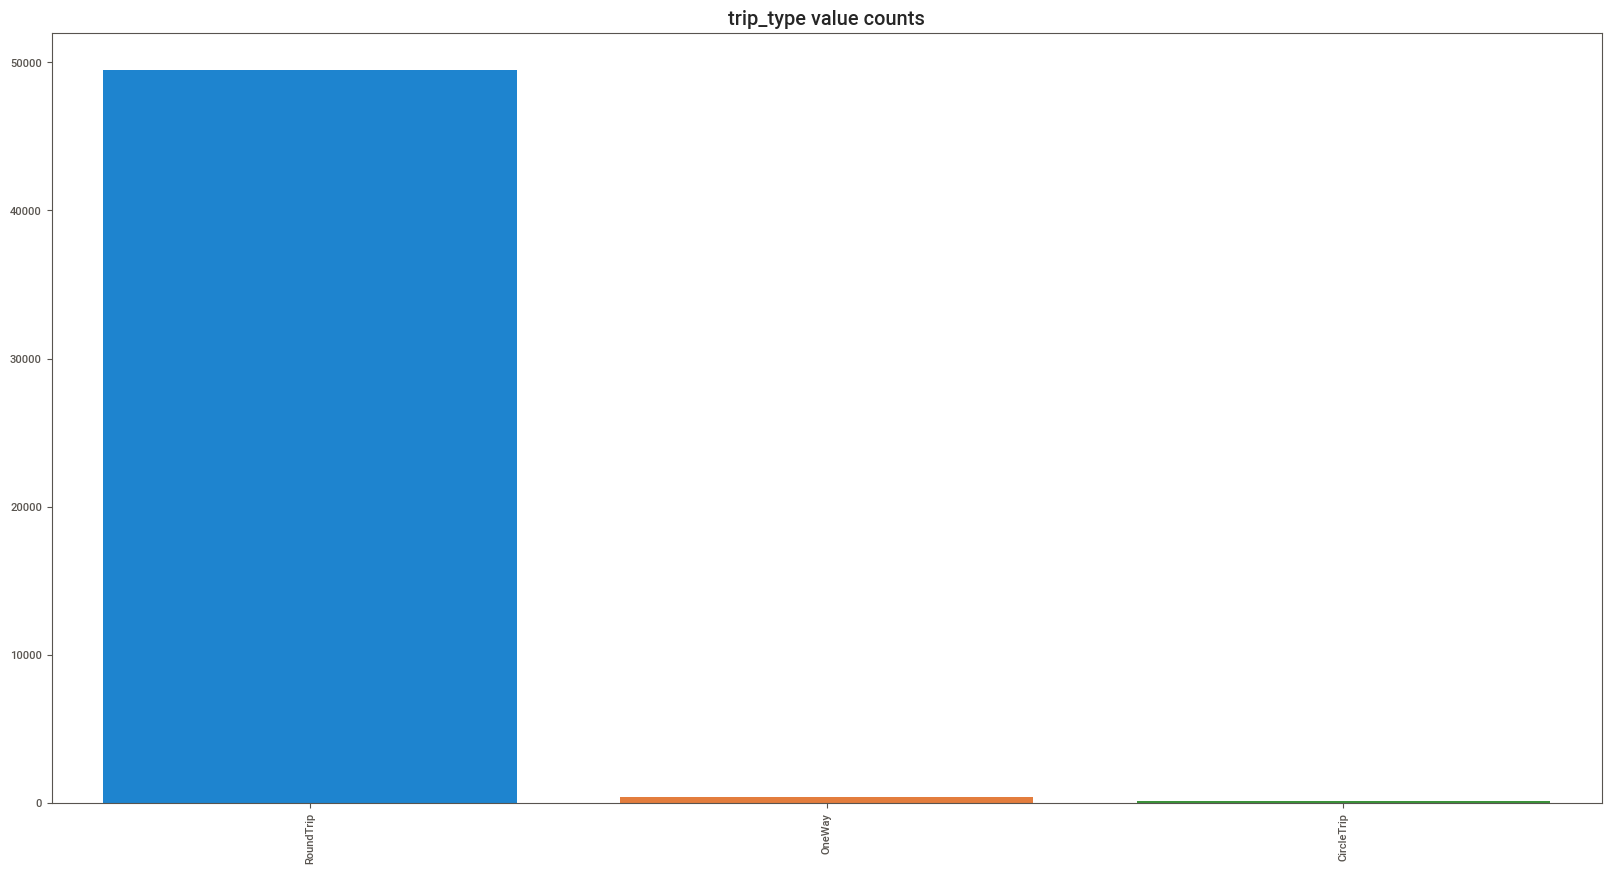

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

<Axes: >

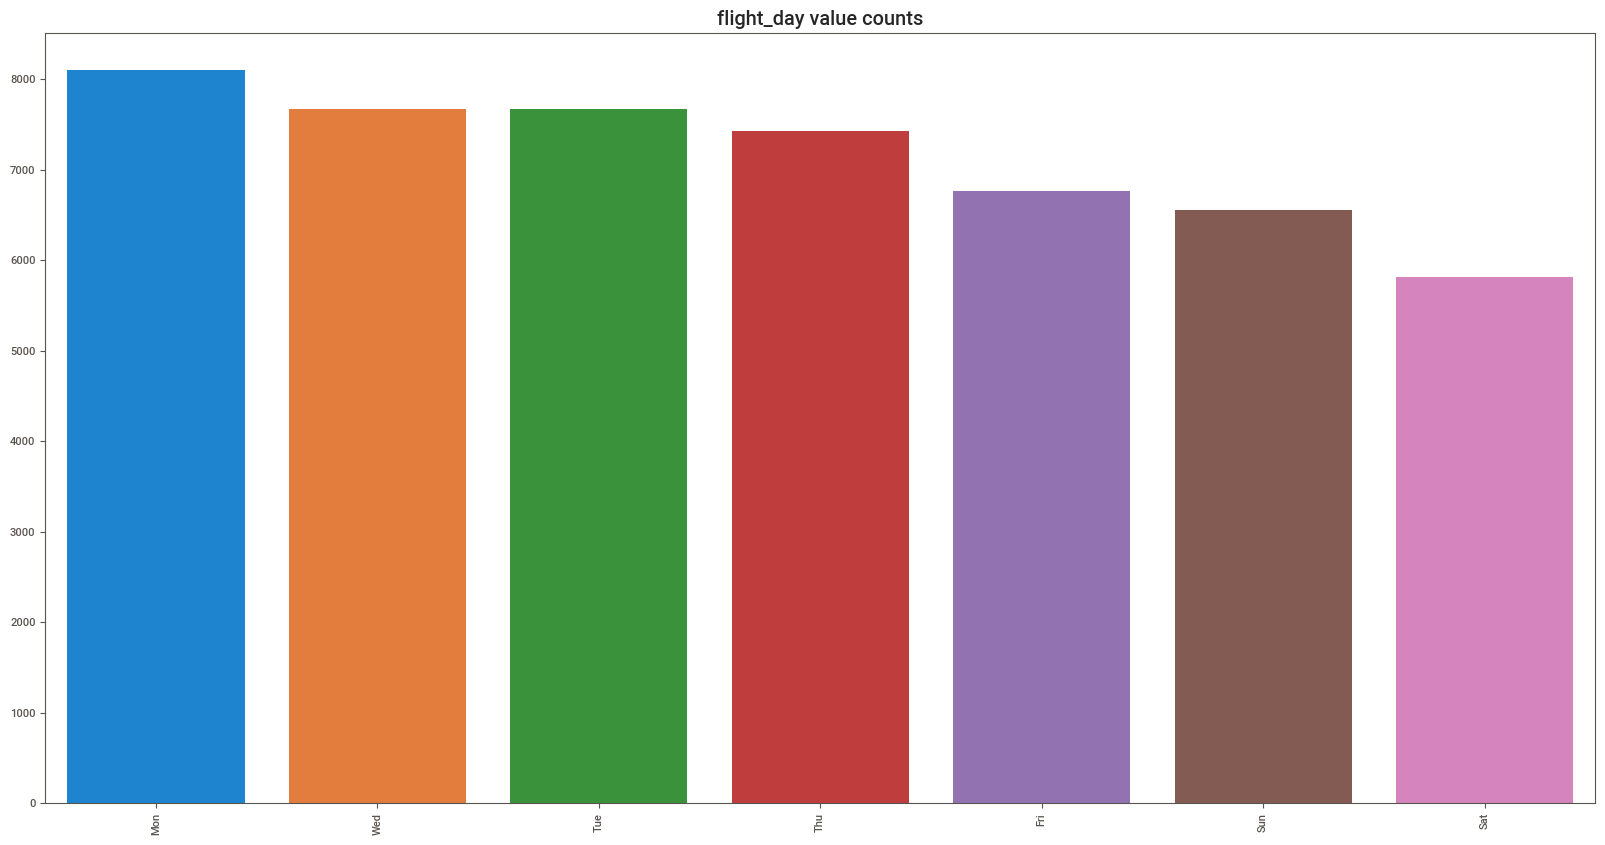

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

<Axes: >

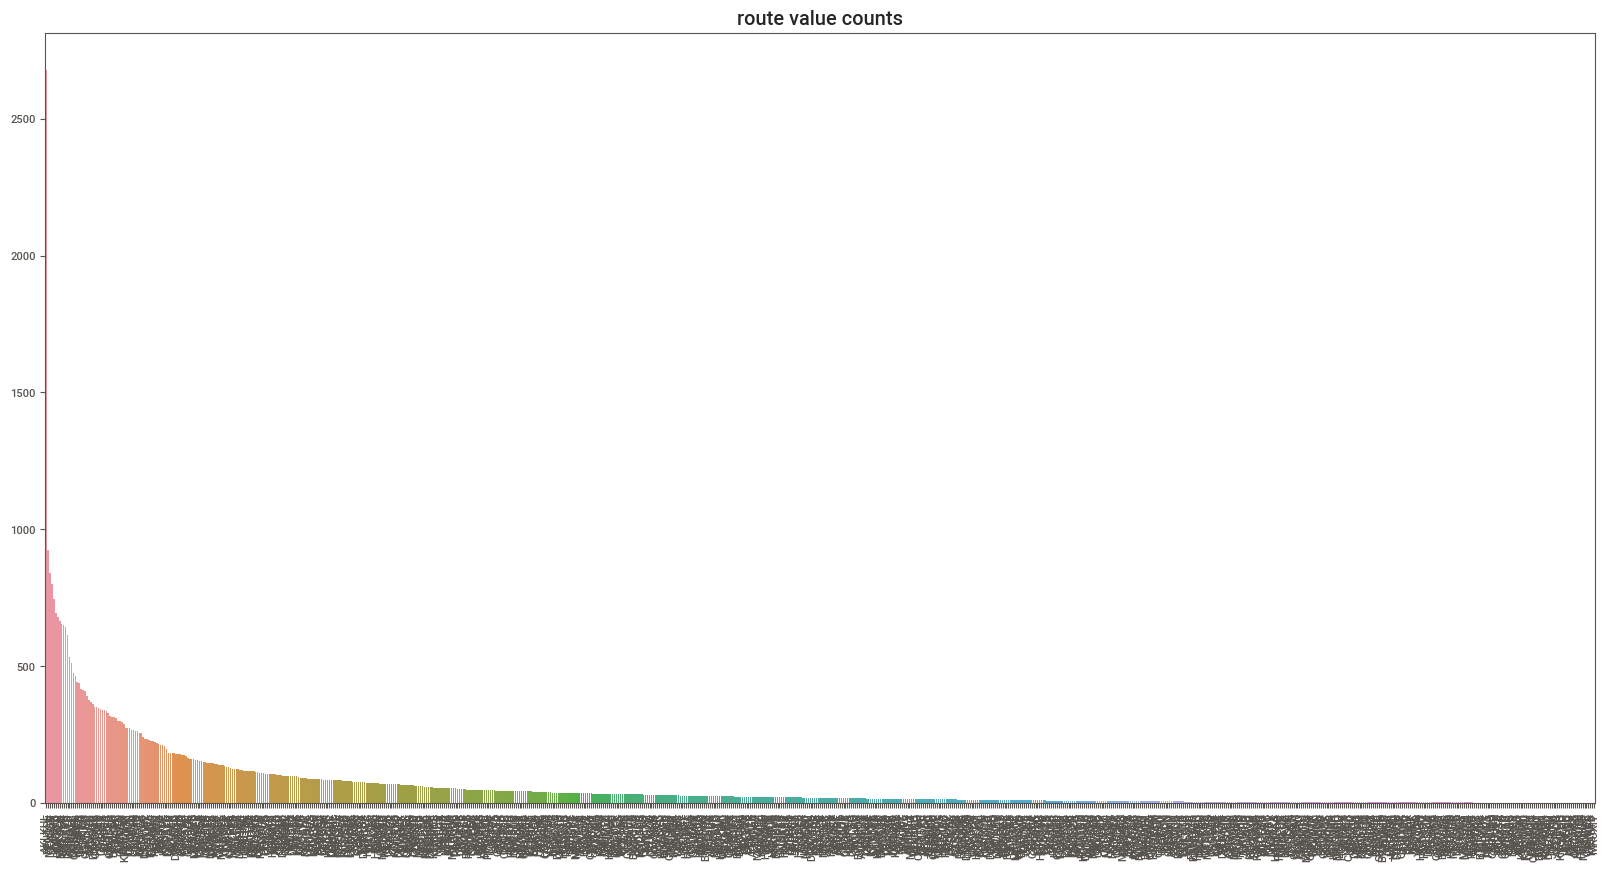

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

<Axes: >

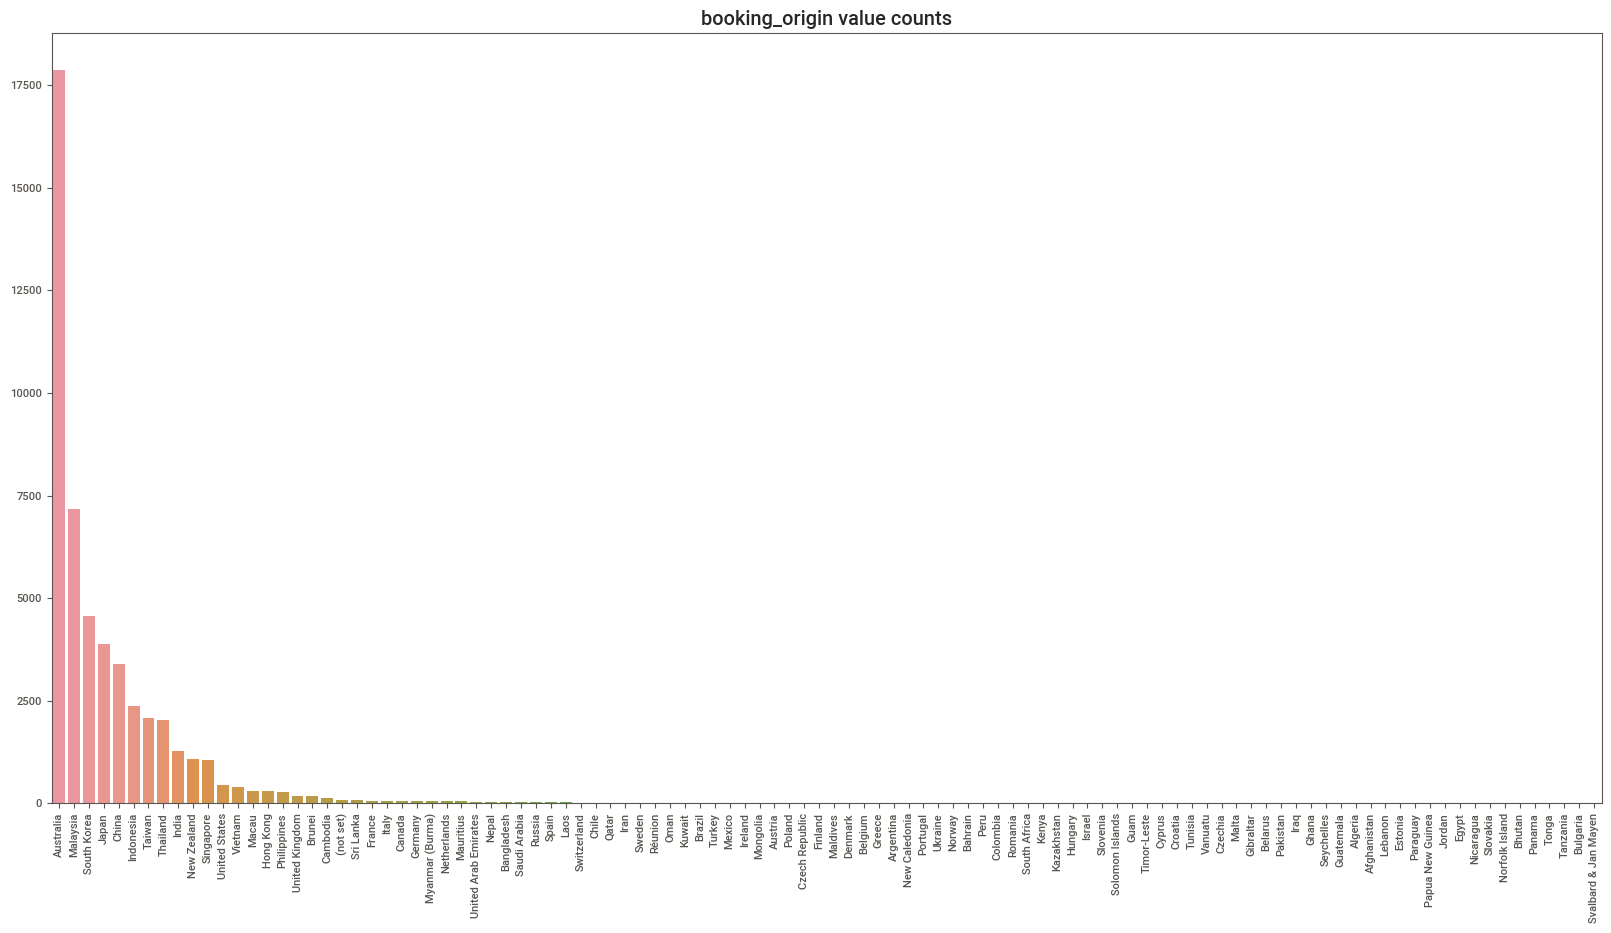

In [17]:
for i in df.select_dtypes(include='object').columns:
  display(df.select_dtypes(include='object')[i].value_counts())
  plt.figure(figsize=(20,10))
  display(sns.barplot(x=df.select_dtypes(include='object')[i].value_counts().index,y=df.select_dtypes(include='object')[i].value_counts().values))
  plt.title(f'{i} value counts')
  plt.xticks(rotation=90)
  plt.show()

<Axes: >

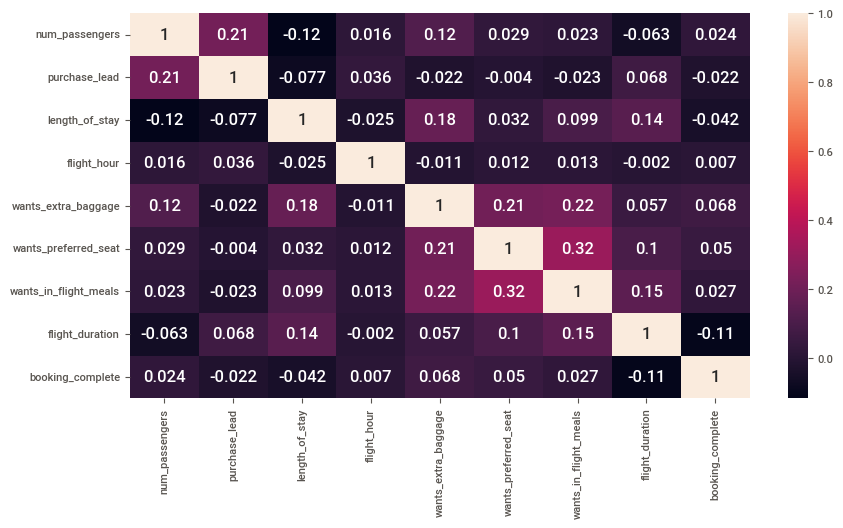

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().round(3),annot=True)

In [19]:
df.select_dtypes(exclude='object').head()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  
0             5.52                 0  
1             5.52                 0  
2             5.52                 0  
3             5.52                 0  
4             5.52                 0

In [21]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [22]:
df['purchase_lead_prop']=df['purchase_lead']/df['purchase_lead'].sum()
df['length_of_stay_prop']=df['length_of_stay']/df['length_of_stay'].sum()
df['flight_hour_prop']=df['flight_hour']/df['flight_hour'].sum()
df['purchase_lead_mean']=(df['purchase_lead']/df['purchase_lead'].mean())
df['length_of_stay_mean']=df['length_of_stay']/df['length_of_stay'].mean()
df['flight_hour_mean']=df['flight_hour']/df['flight_hour'].mean()

[Text(0, 0, 'New Zealand'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'China'),
 Text(4, 0, 'South Korea'),
 Text(5, 0, 'Japan'),
 Text(6, 0, 'Malaysia'),
 Text(7, 0, 'Singapore'),
 Text(8, 0, 'Switzerland'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'Indonesia'),
 Text(11, 0, 'Czech Republic'),
 Text(12, 0, 'Vietnam'),
 Text(13, 0, 'Thailand'),
 Text(14, 0, 'Spain'),
 Text(15, 0, 'Romania'),
 Text(16, 0, 'Ireland'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Slovakia'),
 Text(19, 0, 'United Arab Emirates'),
 Text(20, 0, 'Tonga'),
 Text(21, 0, 'Réunion'),
 Text(22, 0, '(not set)'),
 Text(23, 0, 'Saudi Arabia'),
 Text(24, 0, 'Netherlands'),
 Text(25, 0, 'Qatar'),
 Text(26, 0, 'Hong Kong'),
 Text(27, 0, 'Philippines'),
 Text(28, 0, 'Sri Lanka'),
 Text(29, 0, 'France'),
 Text(30, 0, 'Croatia'),
 Text(31, 0, 'United States'),
 Text(32, 0, 'Laos'),
 Text(33, 0, 'Hungary'),
 Text(34, 0, 'Portugal'),
 Text(35, 0, 'Cyprus'),
 Text(36, 0, 'Australia'),
 Text(37, 0, 'Cambodia'),
 Tex

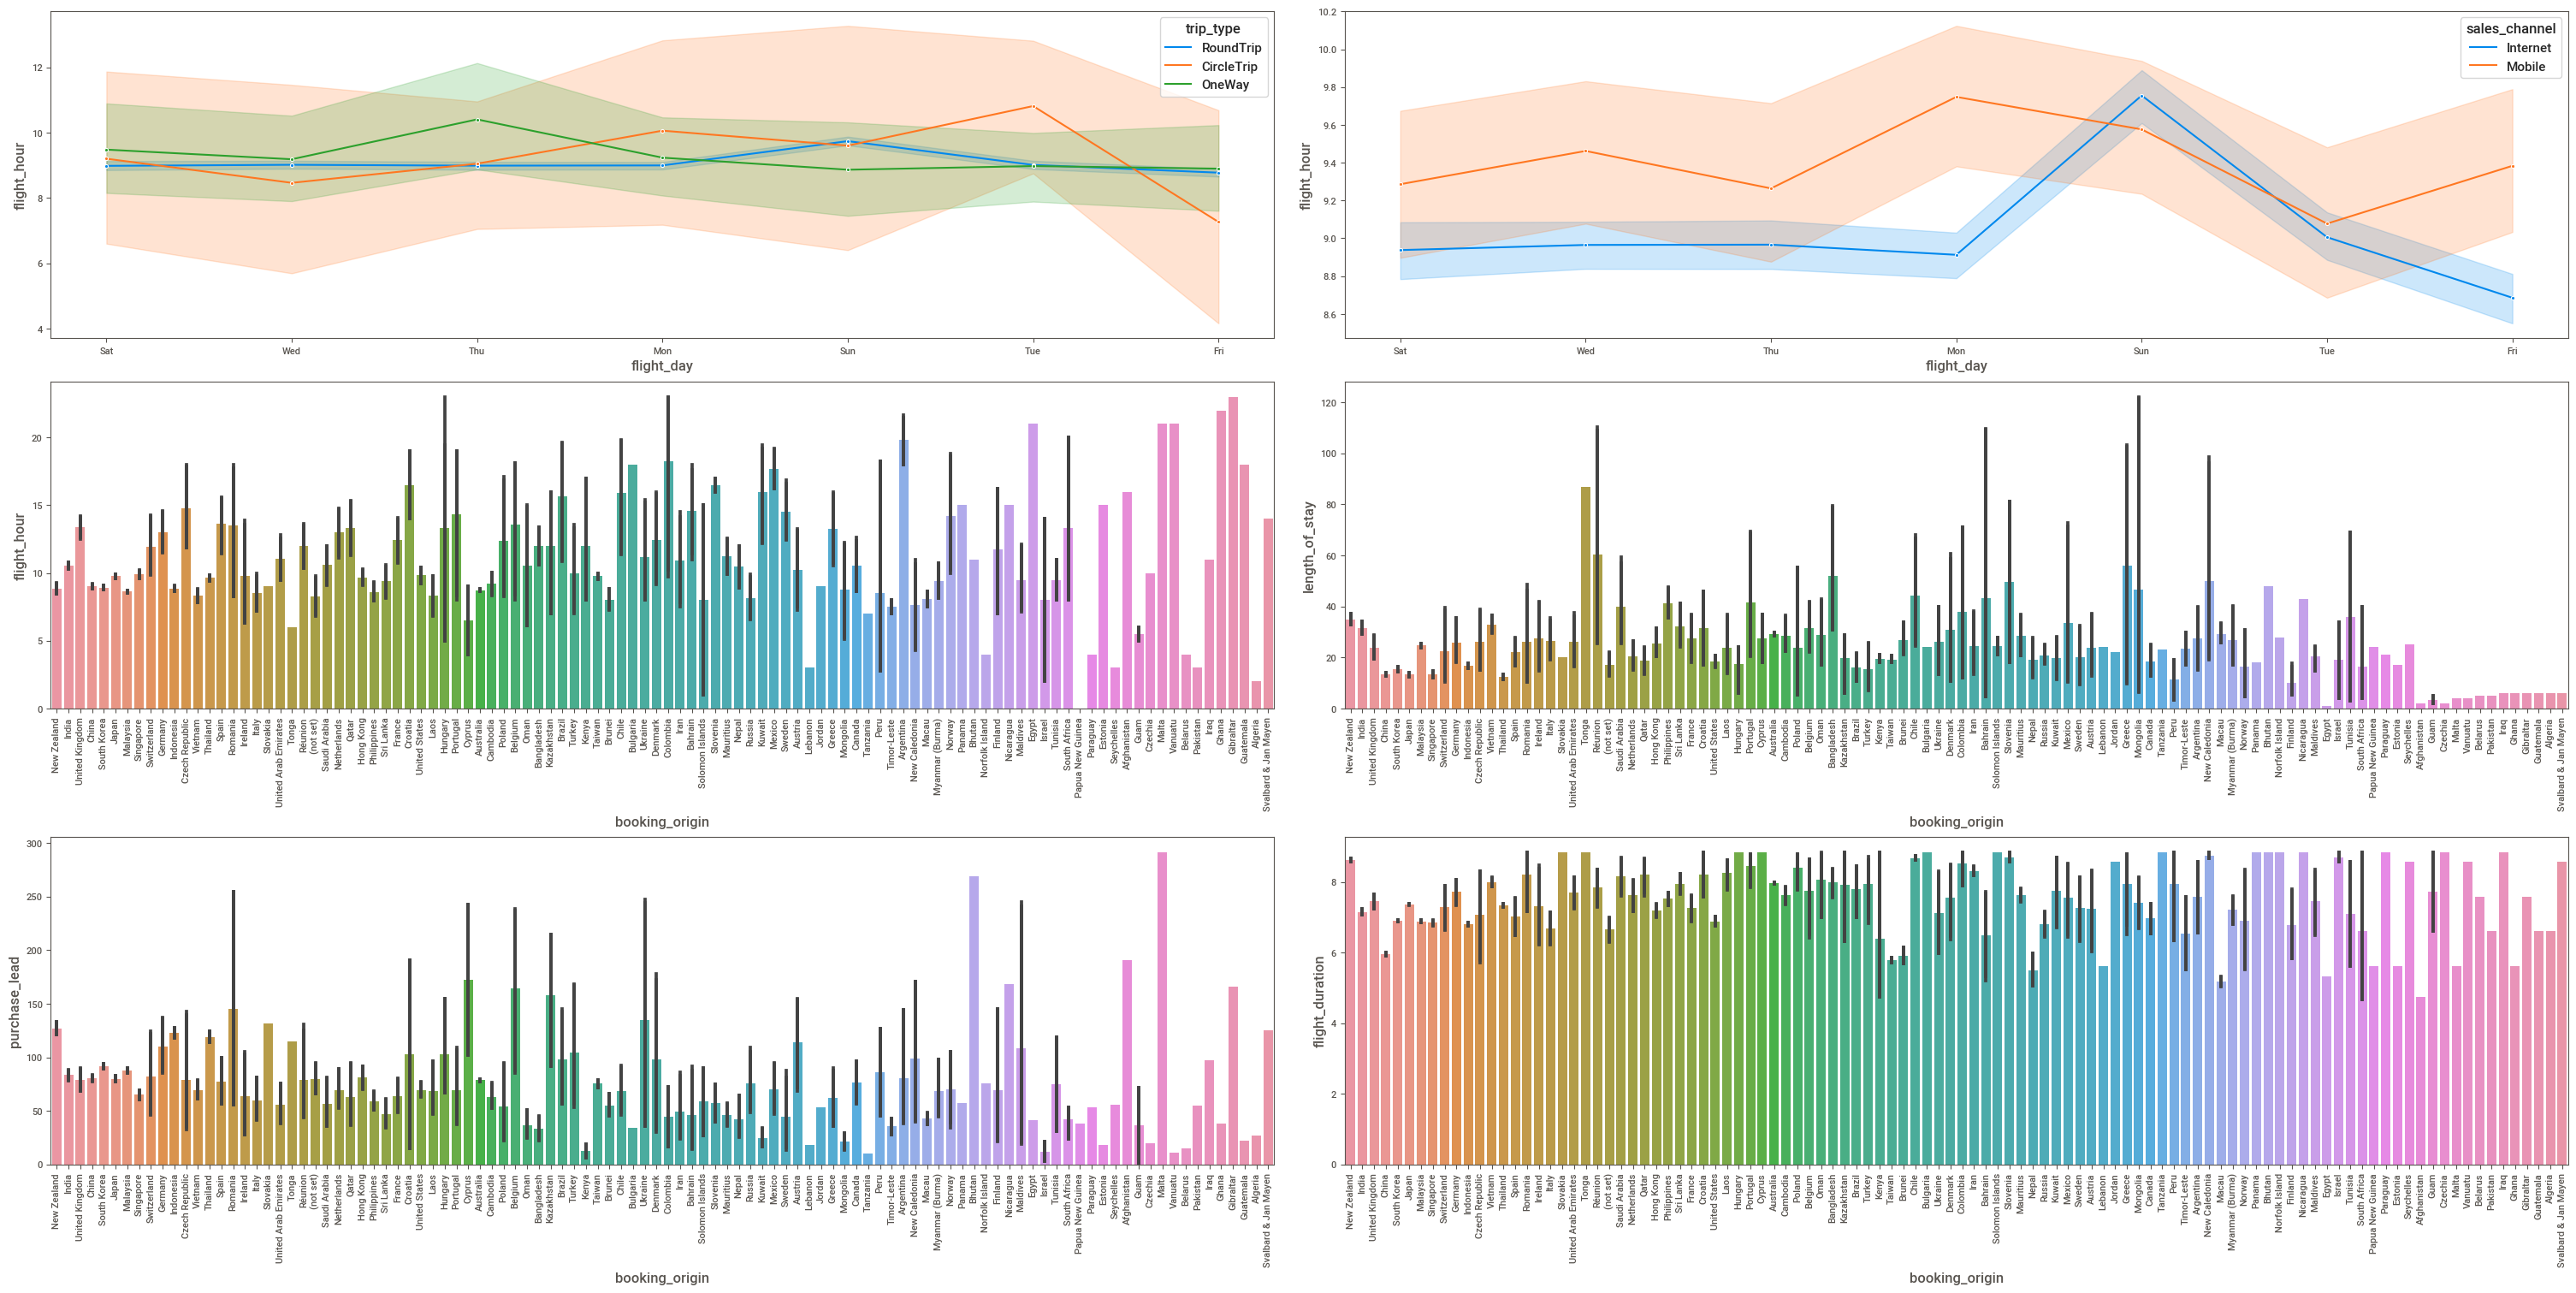

In [35]:
fig,ax=plt.subplots(3,2,figsize=(30,15),layout='constrained')
sns.lineplot(data=df,x='flight_day',y='flight_hour',hue='trip_type',marker='o',ax=ax[0,0])
sns.lineplot(data=df,x='flight_day',y='flight_hour',hue='sales_channel',marker='o',ax=ax[0,1])
#sns.lineplot(data=df,x='flight_day',y='flight_hour',hue='booking_origin',marker='o',ax=ax[0,2])
sns.barplot(data=df,x='booking_origin',y='flight_hour',ax=ax[1,0])
ax[1,0].set_xticklabels(sns.barplot(data=df,x='booking_origin',y='flight_hour',ax=ax[1,0]).get_xticklabels(),rotation=90)
sns.barplot(data=df,x='booking_origin',y='length_of_stay',ax=ax[1,1])
ax[1,1].set_xticklabels(sns.barplot(data=df,x='booking_origin',y='length_of_stay',ax=ax[1,1]).get_xticklabels(),rotation=90)
sns.barplot(data=df,x='booking_origin',y='purchase_lead',ax=ax[2,0])
ax[2,0].set_xticklabels(sns.barplot(data=df,x='booking_origin',y='purchase_lead',ax=ax[2,0]).get_xticklabels(),rotation=90)
sns.barplot(data=df,x='booking_origin',y='flight_duration',ax=ax[2,1])
ax[2,1].set_xticklabels(sns.barplot(data=df,x='booking_origin',y='flight_duration',ax=ax[2,1]).get_xticklabels(),rotation=90)

In [36]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  purchase_lead_prop  length_of_stay_prop  \
0                 0            0.000062             0.000016   
1                 0            0.000026             0.000017   
2                 0            0.000057             0.000019   
3                 0            0.000023             0.000027   
4                 0            0.000016             0.000019   

   flight_hour_prop  purchase_lead_mean  length_of_stay_mean  flight_hour_mean  
0          0.000015            3.084513             0.824490          0.772087  
1          0.000007            1.318570             0.867884          0.330894  
2          0.000038            2.860827             0.954672          1.875068  
3          0.000009            1.130203             1.345220          0.441192  
4          0.000033            0.800561             0.954672          1.654471

In [37]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
encode=OrdinalEncoder()
df[['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']]=pd.DataFrame(encode.fit_transform(df.select_dtypes(include='object')),columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
#df.select_dtypes(include='object').columns=

In [39]:
df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2            0.0        2.0            262              19   
1               1            0.0        2.0            112              20   
2               2            0.0        2.0            243              22   
3               1            0.0        2.0             96              31   
4               2            0.0        2.0             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7         2.0    0.0            61.0                    1   
1            3         2.0    0.0            61.0                    0   
2           17         6.0    0.0            36.0                    1   
3            4         2.0    0.0            61.0                    0   
4           15         6.0    0.0            36.0                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  purchase_lead_prop  length_of_stay_prop  \
0                 0            0.000062             0.000016   
1                 0            0.000026             0.000017   
2                 0            0.000057             0.000019   
3                 0            0.000023             0.000027   
4                 0            0.000016             0.000019   

   flight_hour_prop  purchase_lead_mean  length_of_stay_mean  flight_hour_mean  
0          0.000015            3.084513             0.824490          0.772087  
1          0.000007            1.318570             0.867884          0.330894  
2          0.000038            2.860827             0.954672          1.875068  
3          0.000009            1.130203             1.345220          0.441192  
4          0.000033            0.800561             0.954672          1.654471

In [40]:
x,y=df.drop('num_passengers',axis=1),df['num_passengers']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Modelling with Randomforestregressor

In [77]:
def modelling(model,model_name):
  model_=model
  model_=model_.fit(x_train,y_train)
  print(f'Score: {model.score(x_train,y_train)}')
  score=model.score(x_train,y_train)
  y_pred=model.predict(x_test)
  r2_score_=r2_score(y_test,y_pred)
  mean_absolute_error_=mean_absolute_error(y_test,y_pred)
  mean_squared_error_=mean_squared_error(y_test,y_pred)

  print(f'r2_score: {r2_score_}')
  print(f'mean_absolute_error: {mean_absolute_error_}')
  print(f'mean_squared_error: {mean_squared_error_}')
  sns.barplot(x=['score','r2_score','mean_absolute_error','mean_squared_error'],y=[score,r2_score_,mean_absolute_error_,mean_squared_error_])
  plt.title(f'{model_name}')
  plt.xlabel('metrics')
  plt.ylabel('result')
  plt.show()

Score: 0.873121747360957
r2_score: 0.10299261237240853
mean_absolute_error: 0.6686917469696969
mean_squared_error: 0.9663750409998986


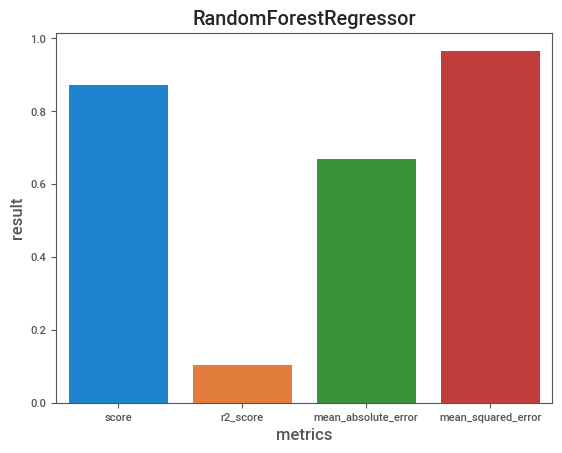

In [79]:
modelling(RandomForestRegressor(),'RandomForestRegressor')

In [72]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.625225
r2_score: -0.23499498497357796
mean_absolute_error: 0.5747
mean_squared_error: 1.3305


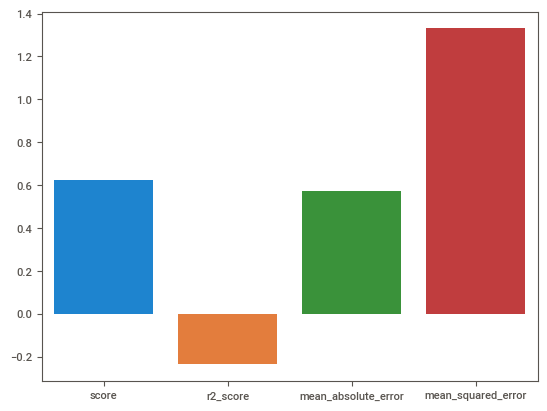

In [73]:
modelling(LogisticRegression())

Score: 0.08476111611122361
r2_score: 0.07632804250629177
mean_absolute_error: 0.6815128272282284
mean_squared_error: 0.9951016436489184


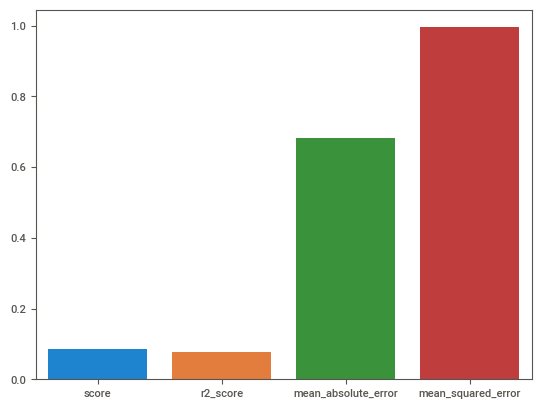

In [74]:
modelling(LinearRegression())

Score: 0.9943055445634786
r2_score: -0.7497850779208506
mean_absolute_error: 0.7916
mean_squared_error: 1.8851


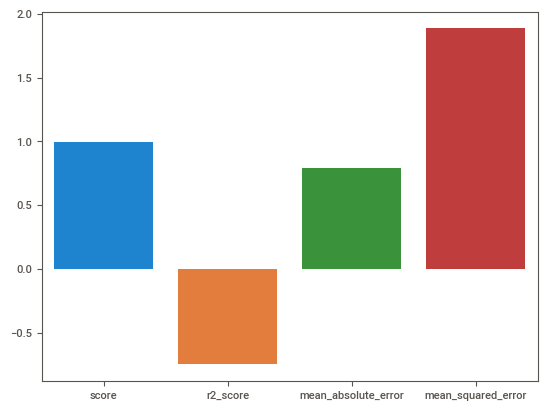

In [75]:
modelling(DecisionTreeRegressor())

Score: -0.0646521110907814
r2_score: -0.05900234770377666
mean_absolute_error: 0.5965390087127528
mean_squared_error: 1.1408974455471328


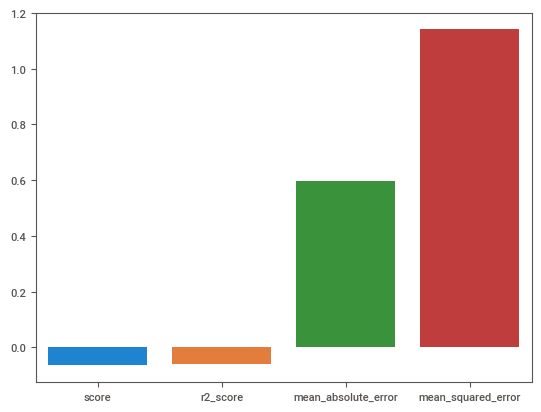

In [76]:
modelling(SVR())

## Model Tuning

In [82]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold

In [88]:
skf=StratifiedKFold(shuffle=True,n_splits=2, random_state=42)
for x_train_index,y_train_index in skf.split(x_train,y_train):
  x_train_fold=x_train.iloc[x_train_index]
  y_train_fold=y_train.iloc[y_train_index]
  x_test_fold=x_train.iloc[x_train_index]
  y_test_fold=y_train.iloc[y_train_index]

In [97]:
def skfmodelling(model,model_name):
  model_=model
  model_=model_.fit(x_train_fold,y_train_fold)
  print(f'Score: {model.score(x_train_fold,y_train_fold)}')
  score=model.score(x_train_fold,y_train_fold)
  y_pred=model.predict(x_test_fold)
  r2_score_=r2_score(y_test_fold,y_pred)
  mean_absolute_error_=mean_absolute_error(y_test_fold,y_pred)
  mean_squared_error_=mean_squared_error(y_test_fold,y_pred)

  print(f'r2_score: {r2_score_}')
  print(f'mean_absolute_error: {mean_absolute_error_}')
  print(f'mean_squared_error: {mean_squared_error_}')
  sns.barplot(x=['score','r2_score','mean_absolute_error','mean_squared_error'],y=[score,r2_score_,mean_absolute_error_,mean_squared_error_])
  plt.title(f'{model_name}')
  plt.xlabel('metrics')
  plt.ylabel('result')
  plt.show()

Score: 0.8457437475284167
r2_score: 0.8457437475284167
mean_absolute_error: 0.28920972451298704
mean_squared_error: 0.15922885702625725


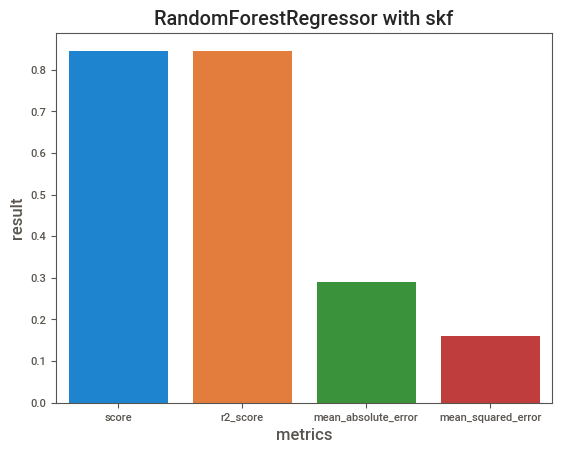

In [105]:
skfmodelling(RandomForestRegressor(),'RandomForestRegressor with skf')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.6258
r2_score: -0.339519257224123
mean_absolute_error: 0.592
mean_squared_error: 1.3827


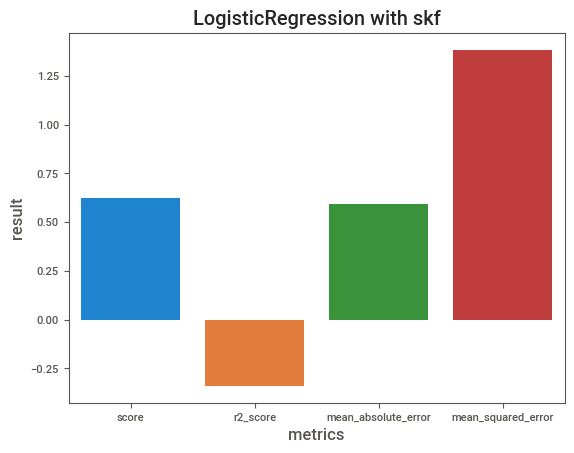

In [104]:
skfmodelling(LogisticRegression(),'LogisticRegression with skf')

Score: 0.0005878251905619969
r2_score: 0.0005878251905619969
mean_absolute_error: 0.7407101180142045
mean_squared_error: 1.031629225676595


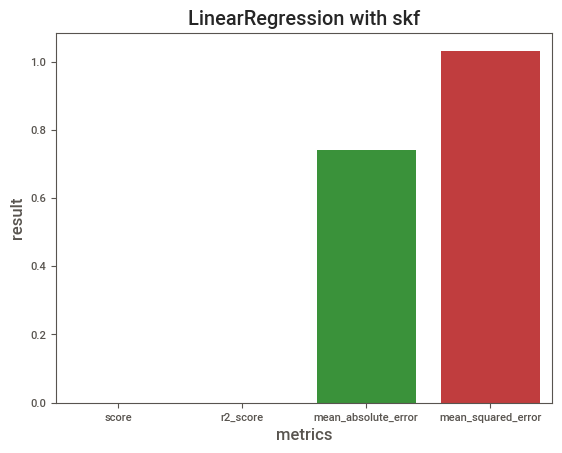

In [101]:
skfmodelling(LinearRegression(),'LinearRegression with skf')

Score: 0.9957180334729655
r2_score: 0.9957180334729655
mean_absolute_error: 0.004199999999999999
mean_squared_error: 0.00442


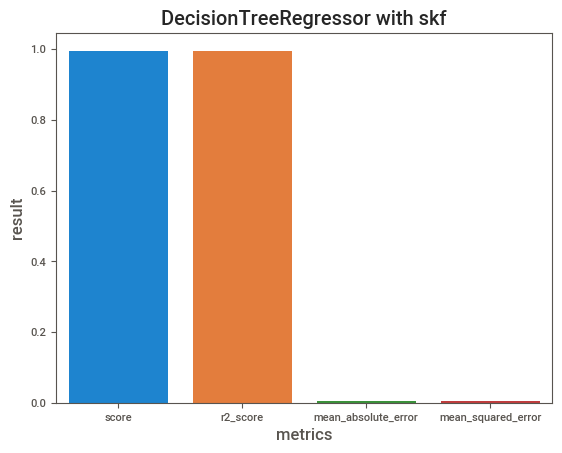

In [102]:
skfmodelling(DecisionTreeRegressor(),'DecisionTreeRegressor with skf')

Score: -0.2344734983402721
r2_score: -0.2344734983402721
mean_absolute_error: 0.6171609459012357
mean_squared_error: 1.274267986032769


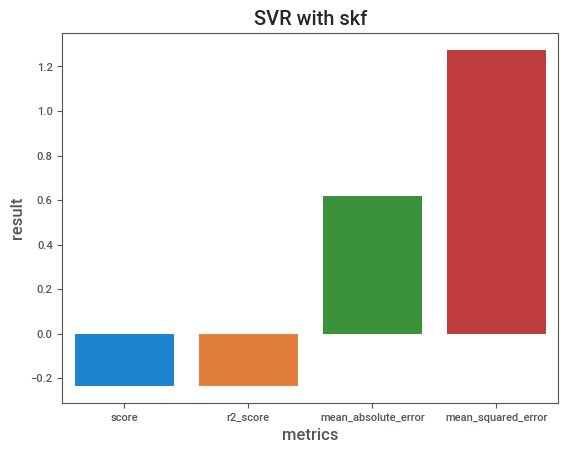

In [103]:
skfmodelling(SVR(),'SVR with skf')

In [106]:
param_grid=[{'n_estimators':[600,650,1000],'max_depth':[7,8,9],'max_features':[7,8,9]}]

grid=GridSearchCV(RandomForestRegressor(),param_grid,scoring='neg_mean_squared_error',cv=5)
grid.fit(x_train_fold,y_train_fold)
#  model=RandomForestRegressor(n_estimators=100, criterion='squared_error',
 #                                     max_depth=None, min_samples_split=a, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=1.0)
  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [7, 8, 9], 'max_features': [7, 8, 9],
                          'n_estimators': [600, 650, 1000]}],
             scoring='neg_mean_squared_error')

In [107]:
grid.best_params_

{'max_depth': 7, 'max_features': 7, 'n_estimators': 1000}

Score: 0.046197608682122415
r2_score: 0.046197608682122415
mean_absolute_error: 0.7267224696801985
mean_squared_error: 0.9845491652044007


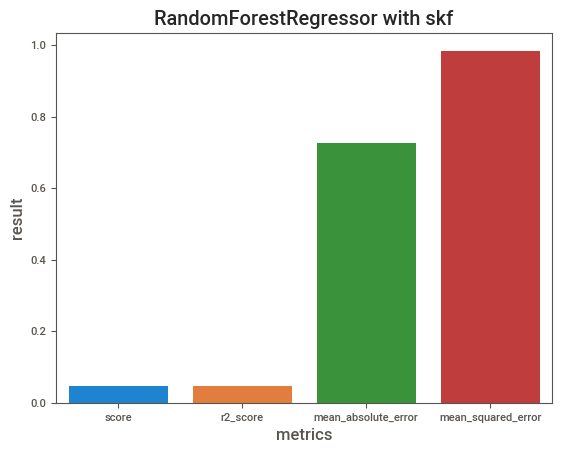

In [108]:
skfmodelling(RandomForestRegressor(n_estimators= 1000,max_features= 7,max_depth= 7),'RandomForestRegressor with skf')

Score: 0.16836725835186872
r2_score: 0.1263976383130062
mean_absolute_error: 0.6490563210260966
mean_squared_error: 0.9411600503377046


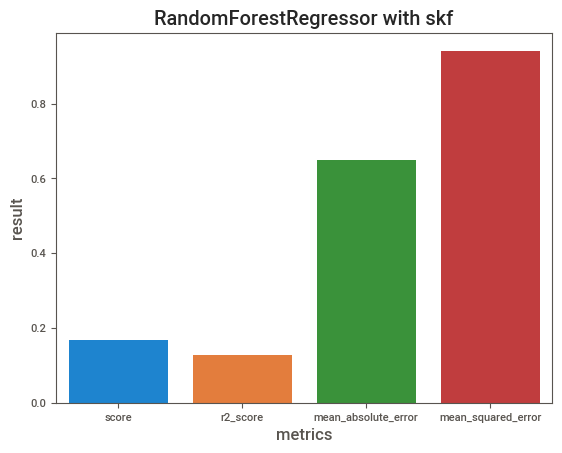

In [109]:
modelling(RandomForestRegressor(n_estimators= 1000,max_features= 7,max_depth= 7),'RandomForestRegressor with skf')